# Extract $r=D^-/D^+$ from SIDIS cross-section ratio of $(e,e'\pi^+)/(e,e'\pi^+)$ 

last edit June-10, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

Welcome to JupyROOT 6.26/06
Loaded bin migration and acceptance weights from MC calculations.


In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
results_path = '/Users/erezcohen/Desktop/data/BAND/Results/' + 'Results_10June2023/'
figures_path = '/Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/Results_rSIDIS/'

# Auxiliary functions

In [4]:
# PhysRevC.85.015202 table 11
JLAB2012_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/JLAB2012_r_Table11.csv',names=['z','r','r_err'],header=0)
JLAB2012_data['Q2'] = 2.3
JLAB2012_data['Q2_min'] = 2.2
JLAB2012_data['Q2_max'] = 2.4


# [B. Hommez, Ph.D. Dissertation, Ghent University (2003), unpublished]
HERMES2000_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/HERMES2000/HERMES2000.csv',names=['z','r','r_err'], header=0)
HERMES2000_data['Q2'] = 2
HERMES2000_data['Q2_min'] = 1.01
HERMES2000_data['Q2_max'] = 7



Cornell77_xB_024_Q2_20_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/Cornell77_xB_0.24_Q2_2.0.csv',names=['z','R'])
# Cornell77 with manual errorbar estimation
Cornell77_xB_024_Q2_20_data['z_err'] = [0.04,0.02]
Cornell77_xB_024_Q2_20_data['R_err'] = [0.1,0.1]
(Cornell77_xB_024_Q2_20_data['r'],Cornell77_xB_024_Q2_20_data['r_err'],_) = get_r_from_CrossSectionRatio(Cornell77_xB_024_Q2_20_data['R'], Cornell77_xB_024_Q2_20_data['R_err'], Cornell77_xB_024_Q2_20_data['R_err'])
Cornell77_xB_024_Q2_20_data['Q2'] = 2.0
Cornell77_xB_024_Q2_20_data['Q2_min'] = 1.9
Cornell77_xB_024_Q2_20_data['Q2_max'] = 2.1

# Cornell77 with manual errorbar estimation
Cornell77_xB_05_Q2_40_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/Cornell77_xB_0.5_Q2_4.0.csv',names=['z','R'])
Cornell77_xB_05_Q2_40_data['z_err'] = [0.04,0.02]
Cornell77_xB_05_Q2_40_data['R_err'] = [0.1,0.3]
(Cornell77_xB_05_Q2_40_data['r'],Cornell77_xB_05_Q2_40_data['r_err'],_) = get_r_from_CrossSectionRatio(Cornell77_xB_05_Q2_40_data['R'], Cornell77_xB_05_Q2_40_data['R_err'], Cornell77_xB_05_Q2_40_data['R_err'])
Cornell77_xB_05_Q2_40_data['Q2'] = 4.0
Cornell77_xB_05_Q2_40_data['Q2_min'] = 3.9
Cornell77_xB_05_Q2_40_data['Q2_max'] = 4.1


# JLAB2012_data = pd.read_csv('/Users/erezcohen/Desktop/Projects/BAND/SIDIS/JLAB2012/JLAB2012.csv',names=['z','R'])
# JLAB2012_data
# # manual errorbar estimation for JLAB2012 data - very tiny except the first point which is roughly 10% uncertainty and last point which has roughly 5% uncertainty
# JLAB2012_data['R_err'] = 0.005*JLAB2012_data['R']
# JLAB2012_data['R_err'][0] = 0.1*JLAB2012_data['R'][0]
# JLAB2012_data['R_err'][17] = 0.05*JLAB2012_data['R'][17]
# (JLAB2012_data['r'],JLAB2012_data['r_err'],_) = get_r_from_CrossSectionRatio(JLAB2012_data['R'], JLAB2012_data['R_err'], JLAB2012_data['R_err'])

In [86]:
def plot_existing_data(var='r',x0=0.32,z0=0.5,do_JLAB2012=True, do_HERMES2000=True, do_Cornell77=True):
    '''
    var 'r', 'R', 'r(Q^2,x=x0,z=z0)'
    
    '''
    if var=='r':
        if do_JLAB2012:
            plt.errorbar( x=JLAB2012_data.z, y=JLAB2012_data.r, yerr=JLAB2012_data.r_err, 
                         markersize=10, capsize=0,capthick=2,
                             marker='s', color=[1,0,0.], markeredgecolor=[0,0,0],linestyle='None', label='JLAB 2012,   $x=0.32, Q^2=2.3, W=2.4$')

        if do_HERMES2000:
            plt.errorbar( x=HERMES2000_data.z, y=HERMES2000_data.r, yerr=HERMES2000_data.r_err, 
                     markersize=10, capsize=0,capthick=2,
                     marker='o', color='k', markerfacecolor='forestgreen',
                     linestyle='None', 
                     label='HERMES 2000, $x=0.32, 1<Q^2, 3.3<W$')

        if do_Cornell77:
            plt.errorbar( x=Cornell77_xB_024_Q2_20_data.z, y=Cornell77_xB_024_Q2_20_data.r, 
                         xerr=Cornell77_xB_024_Q2_20_data.z_err, yerr=Cornell77_xB_024_Q2_20_data.r_err, 
                         markersize=15,linestyle='None',
                        marker='^', color='k', markerfacecolor='k',
                        label='Cornell 1977, $x=0.24, Q^2=2.0, W=2.7$')

            plt.errorbar( x=Cornell77_xB_05_Q2_40_data.z, y=Cornell77_xB_05_Q2_40_data.r, 
                         xerr=Cornell77_xB_05_Q2_40_data.z_err, yerr=Cornell77_xB_05_Q2_40_data.r_err, 
                         markersize=15,linestyle='None',
                        marker='^', color='k',markerfacecolor='w',
                        label='Cornell 1977, $x=0.50, Q^2=4.0, W=2.7$')
        
    elif var=='r(Q^2,x=x0,z=z0)':
        JLAB2012_z0 = JLAB2012_data[np.abs(JLAB2012_data.z - z0) < 0.015]
        plt.errorbar( x=JLAB2012_z0.Q2, xerr=[JLAB2012_z0.Q2-JLAB2012_z0.Q2_min,JLAB2012_z0.Q2_max - JLAB2012_z0.Q2], 
                      y=JLAB2012_z0.r, yerr=JLAB2012_z0.r_err, 
                     markersize=10, capsize=0,capthick=2,
                         marker='s', color=[1,0,0.], markeredgecolor=[0,0,0],linestyle='None', label='JLAB 2012,   $x=0.32, Q^2=2.3, W=2.4$')
        
        HERMES2000_data_z0 = HERMES2000_data[np.abs(HERMES2000_data.z - z0) < 0.015]
        plt.errorbar( x=HERMES2000_data_z0.Q2, xerr=[HERMES2000_data_z0.Q2-HERMES2000_data_z0.Q2_min,HERMES2000_data_z0.Q2_max - HERMES2000_data_z0.Q2], 
                     y=HERMES2000_data_z0.r, yerr=HERMES2000_data_z0.r_err, 
                     markersize=10, capsize=0,capthick=2,
                     marker='o', color='k', markerfacecolor='forestgreen',
                     linestyle='None', 
                     label='HERMES 2000, $x=0.32, 1<Q^2, 3.3<W$')

        if do_Cornell77:
            Cornell77_xB_024_Q2_20_data_z0 = Cornell77_xB_024_Q2_20_data[np.abs(Cornell77_xB_024_Q2_20_data.z - z0) < 0.02]
            plt.errorbar( x=Cornell77_xB_024_Q2_20_data_z0.Q2, 
                         xerr=[Cornell77_xB_024_Q2_20_data_z0.Q2-Cornell77_xB_024_Q2_20_data_z0.Q2_min,Cornell77_xB_024_Q2_20_data_z0.Q2_max - Cornell77_xB_024_Q2_20_data_z0.Q2], 
                         y=Cornell77_xB_024_Q2_20_data_z0.r, 
                         yerr=Cornell77_xB_024_Q2_20_data_z0.r_err, 
                         markersize=15,linestyle='None',
                        marker='^', color='k', markerfacecolor='k',
                        label='Cornell 1977, $x=0.24, Q^2=2.0, W=2.7$')

            Cornell77_xB_05_Q2_40_data_z0 = Cornell77_xB_05_Q2_40_data[np.abs(Cornell77_xB_05_Q2_40_data.z - z0) < 0.02]
            plt.errorbar( x=Cornell77_xB_05_Q2_40_data_z0.Q2, 
                         xerr=[Cornell77_xB_05_Q2_40_data_z0.Q2-Cornell77_xB_05_Q2_40_data_z0.Q2_min,Cornell77_xB_05_Q2_40_data_z0.Q2_max - Cornell77_xB_05_Q2_40_data_z0.Q2],                      
                         y=Cornell77_xB_05_Q2_40_data_z0.r, 
                         yerr=Cornell77_xB_05_Q2_40_data_z0.r_err, 
                         markersize=15,linestyle='None',
                        marker='^', color='k',markerfacecolor='w',
                        label='Cornell 1977, $x=0.50, Q^2=4.0, W=2.7$')        
        
    elif var=='R' or var=='Xsec ratio':
        plt.scatter( x=JLAB2012_data.z, y=JLAB2012_data.R, s=150,
                 marker='s', color=[1,0,0.],linestyle='None', label='JLAB 2012, $x=0.32, Q^2=2.3, W=2.4$')

        plt.errorbar( x=Cornell77_xB_024_Q2_20_data.z, y=Cornell77_xB_024_Q2_20_data.R, 
                     xerr=Cornell77_xB_024_Q2_20_data.z_err, yerr=Cornell77_xB_024_Q2_20_data.R_err, 
                     markersize=15,linestyle='None',
                    marker='^', color='k', markerfacecolor='k',
                    label='Cornell 1977, $x=0.24, Q^2=2.0, W=2.7$')

        plt.errorbar( x=Cornell77_xB_05_Q2_40_data.z, y=Cornell77_xB_05_Q2_40_data.R, 
                     xerr=Cornell77_xB_05_Q2_40_data.z_err, yerr=Cornell77_xB_05_Q2_40_data.R_err, 
                     markersize=15,linestyle='None',
                    marker='^', color='k',markerfacecolor='w',
                    label='Cornell 1977, $x=0.50, Q^2=4.0, W=2.7$')
    return


# (1) Convert cross-section ratio to $r=D^-/D^+$ and plot it

In [6]:
z_arr,z_errdw_arr,z_errup_arr, r_arr, r_errup_arr, r_errdw_arr = dict(),dict(),dict(),dict(),dict(),dict()

In [7]:
xlim = (0.27,0.94)
ylim = (0.,1)#

## (1.0) With vs. without acceptance corrections
without = only beam charge weighting

with = beam charge, bin migration, and acceptance corrections

In [69]:
xB_selected = 0.32
Delta_xB    = 0.02
prefix      = 'Untagged_SIDIS_ratio_'
data_path   = results_path + 'Q2_bins_with_partial_corrections/'
suffixes    = []
for Q2_min in [2,3,4]:
    Q2_max = Q2_min + 0.5
    for suffix_str,weight_option in zip(['meson_subtraction','bin_migration','acceptance','bin_migration_acceptance','bin_migration_acceptance_meson_subtraction'],                                   
                                        ['meson subtraction','bin migration','acceptance','bin migration + acceptance','bin migration + acceptance + meson subtraction']):
        suffix   = suffix_str +'_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
        suffixes.append(suffix)
    
print(suffixes)
r_Results = extract_r_from_SIDIS_ratio(data_path = data_path,
                                       prefix      = prefix,
                                       suffixes    = suffixes,
                                       xB_selected = xB_selected, 
                                       Delta_xB    = Delta_xB,
                                       fdebug      = 0 )
[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results



['meson_subtraction_2.0_Q2_2.5', 'bin_migration_2.0_Q2_2.5', 'acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_meson_subtraction_2.0_Q2_2.5', 'meson_subtraction_3.0_Q2_3.5', 'bin_migration_3.0_Q2_3.5', 'acceptance_3.0_Q2_3.5', 'bin_migration_acceptance_3.0_Q2_3.5', 'bin_migration_acceptance_meson_subtraction_3.0_Q2_3.5', 'meson_subtraction_4.0_Q2_4.5', 'bin_migration_4.0_Q2_4.5', 'acceptance_4.0_Q2_4.5', 'bin_migration_acceptance_4.0_Q2_4.5', 'bin_migration_acceptance_meson_subtraction_4.0_Q2_4.5']
Done loading Untagged_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_10June2023/Q2_bins_with_partial_corrections/
For ['meson_subtraction_2.0_Q2_2.5', 'bin_migration_2.0_Q2_2.5', 'acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_meson_subtraction_2.0_Q2_2.5', 'meson_subtraction_3.0_Q2_3.5', 'bin_migration_3.0_Q2_3.5', 'acceptance_3.0_Q2_3.5', 'bin_m

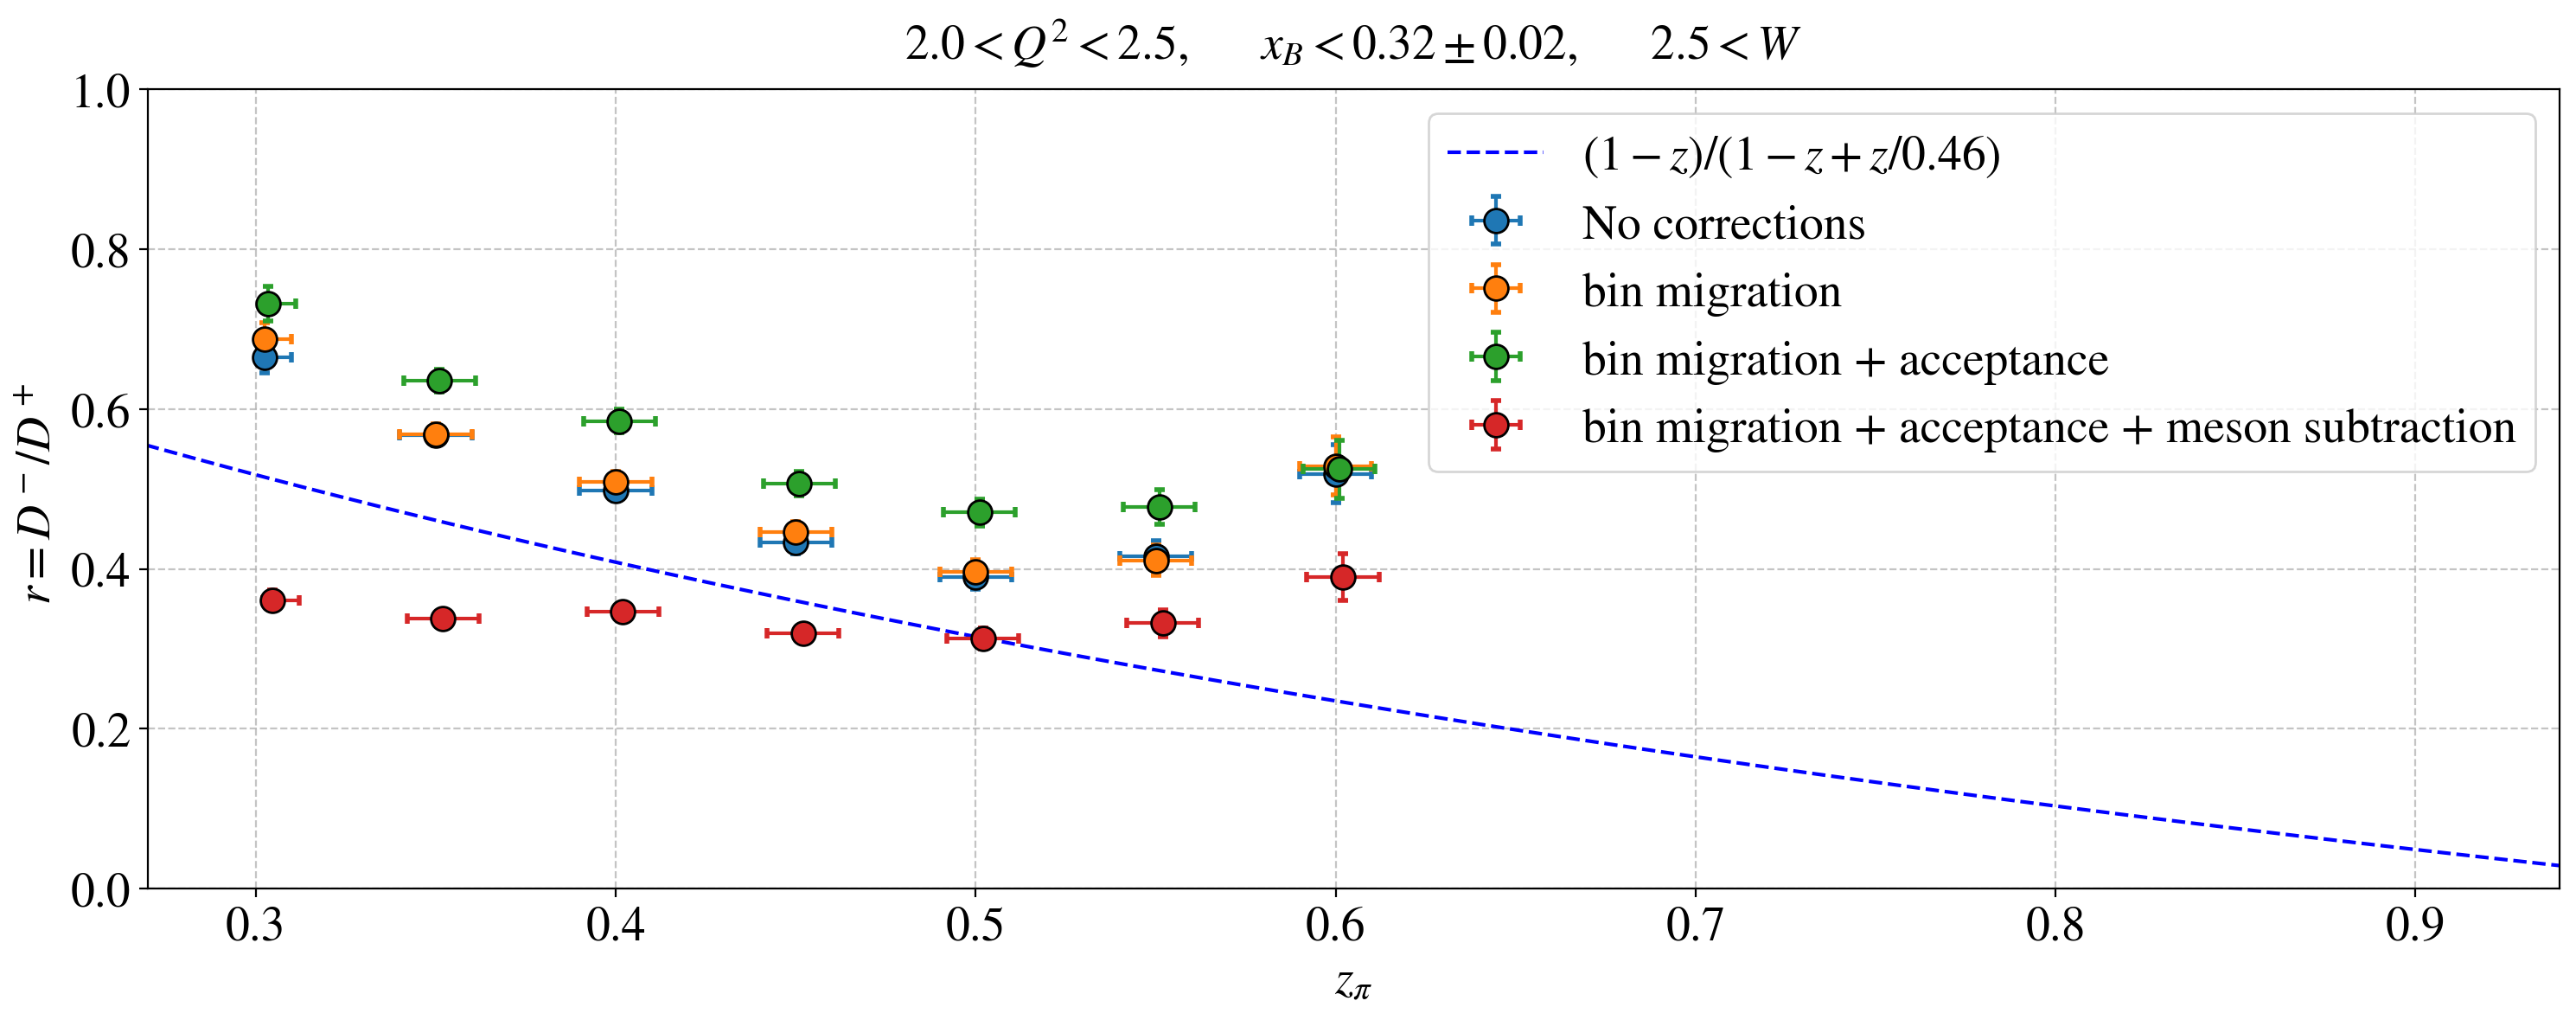

In [70]:
do_add_legend = True;

for Q2_min in [2]:#,3,4]:
    Q2_max = Q2_min + 0.5
    fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
    try:
        suffix   = 'bin_migration_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
        plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                               z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                               r     = r_arr[suffix],
                               r_err = (r_errdw_arr[suffix] + r_errup_arr[suffix])/2,
                               label = 'No corrections', 
                               ax    = ax, 
                               do_add_fit_to_label=False);
    except: print('no data for',suffix)
    plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
    for suffix_str,weight_option,suffix_idx in zip(['bin_migration','bin_migration_acceptance','bin_migration_acceptance_meson_subtraction'], 
                                                   ['bin migration','bin migration + acceptance','bin migration + acceptance + meson subtraction'],
                                                   [0,1,2,3]):
        suffix   = suffix_str +'_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
        try: plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+0.001*np.random.uniform(1)*suffix_idx, z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                        r     = r_corrected_arr[suffix], r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                        label = weight_option,  ax    = ax, 
                                        do_add_fit_to_label=False);
        except: print('no data for',suffix)        
    set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", 
             title='$%.1f<Q^2<%.1f$,      $x_B<%.2f\pm%.2f$,      $2.5 < W$'%(Q2_min,Q2_max,xB_selected, Delta_xB),
             do_add_grid=True, do_add_legend=do_add_legend, 
             xlim=xlim, ylim=ylim,fontsize=20);
    # if do_add_legend:
    #     ax.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)
    # save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_WithAndWithoutAcceptanceCorrections'%(xB_selected, Delta_xB,Q2min,Q2max) + '.pdf' )

## (1.0.1) Acc. match. in 2D + acceptance corrections vs. Acc match. in 3D

In [71]:
xB_selected = 0.32
Delta_xB    = 0.02
prefix      = 'Untagged_SIDIS_ratio_'
data_path = results_path + 'Q2_bins_AcceptanceMatch3D'
suffixes = ['2.0_Q2_2.5','3.0_Q2_3.5','4.0_Q2_4.5']
r_Results = extract_r_from_SIDIS_ratio(data_path = data_path,
                                       prefix      = prefix,
                                       suffixes    = suffixes,
                                       xB_selected = xB_selected, 
                                       Delta_xB    = Delta_xB,
                                       fdebug      = 0 )
[z_arr_AccMatch3D,z_errdw_arr_AccMatch3D,z_errup_arr_AccMatch3D, 
 r_arr_AccMatch3D, r_errup_arr_AccMatch3D, r_errdw_arr_AccMatch3D, 
 r_corrected_arr_AccMatch3D, r_corrected_errup_arr_AccMatch3D, r_corrected_errdw_arr_AccMatch3D] = r_Results

Done loading Untagged_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_10June2023/Q2_bins_AcceptanceMatch3D
For ['2.0_Q2_2.5', '3.0_Q2_3.5', '4.0_Q2_4.5']


In [74]:
z_arr.keys()

dict_keys(['meson_subtraction_2.0_Q2_2.5', 'bin_migration_2.0_Q2_2.5', 'acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_2.0_Q2_2.5', 'bin_migration_acceptance_meson_subtraction_2.0_Q2_2.5', 'meson_subtraction_3.0_Q2_3.5', 'bin_migration_3.0_Q2_3.5', 'acceptance_3.0_Q2_3.5', 'bin_migration_acceptance_3.0_Q2_3.5', 'bin_migration_acceptance_meson_subtraction_3.0_Q2_3.5', 'meson_subtraction_4.0_Q2_4.5', 'bin_migration_4.0_Q2_4.5', 'acceptance_4.0_Q2_4.5', 'bin_migration_acceptance_4.0_Q2_4.5', 'bin_migration_acceptance_meson_subtraction_4.0_Q2_4.5'])

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/Results_rSIDIS/r_vs_z_x_0.32pm0.02_2.0_Q2_2.5_allW_accMatch_2D_vs_3D.pdf
saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/Results_rSIDIS/r_vs_z_x_0.32pm0.02_3.0_Q2_3.5_allW_accMatch_2D_vs_3D.pdf
no data for bin_migration_acceptance_4.0_Q2_4.5
no data for bin_migration_acceptance_4.0_Q2_4.5
saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/Results_rSIDIS/r_vs_z_x_0.32pm0.02_4.0_Q2_4.5_allW_accMatch_2D_vs_3D.pdf


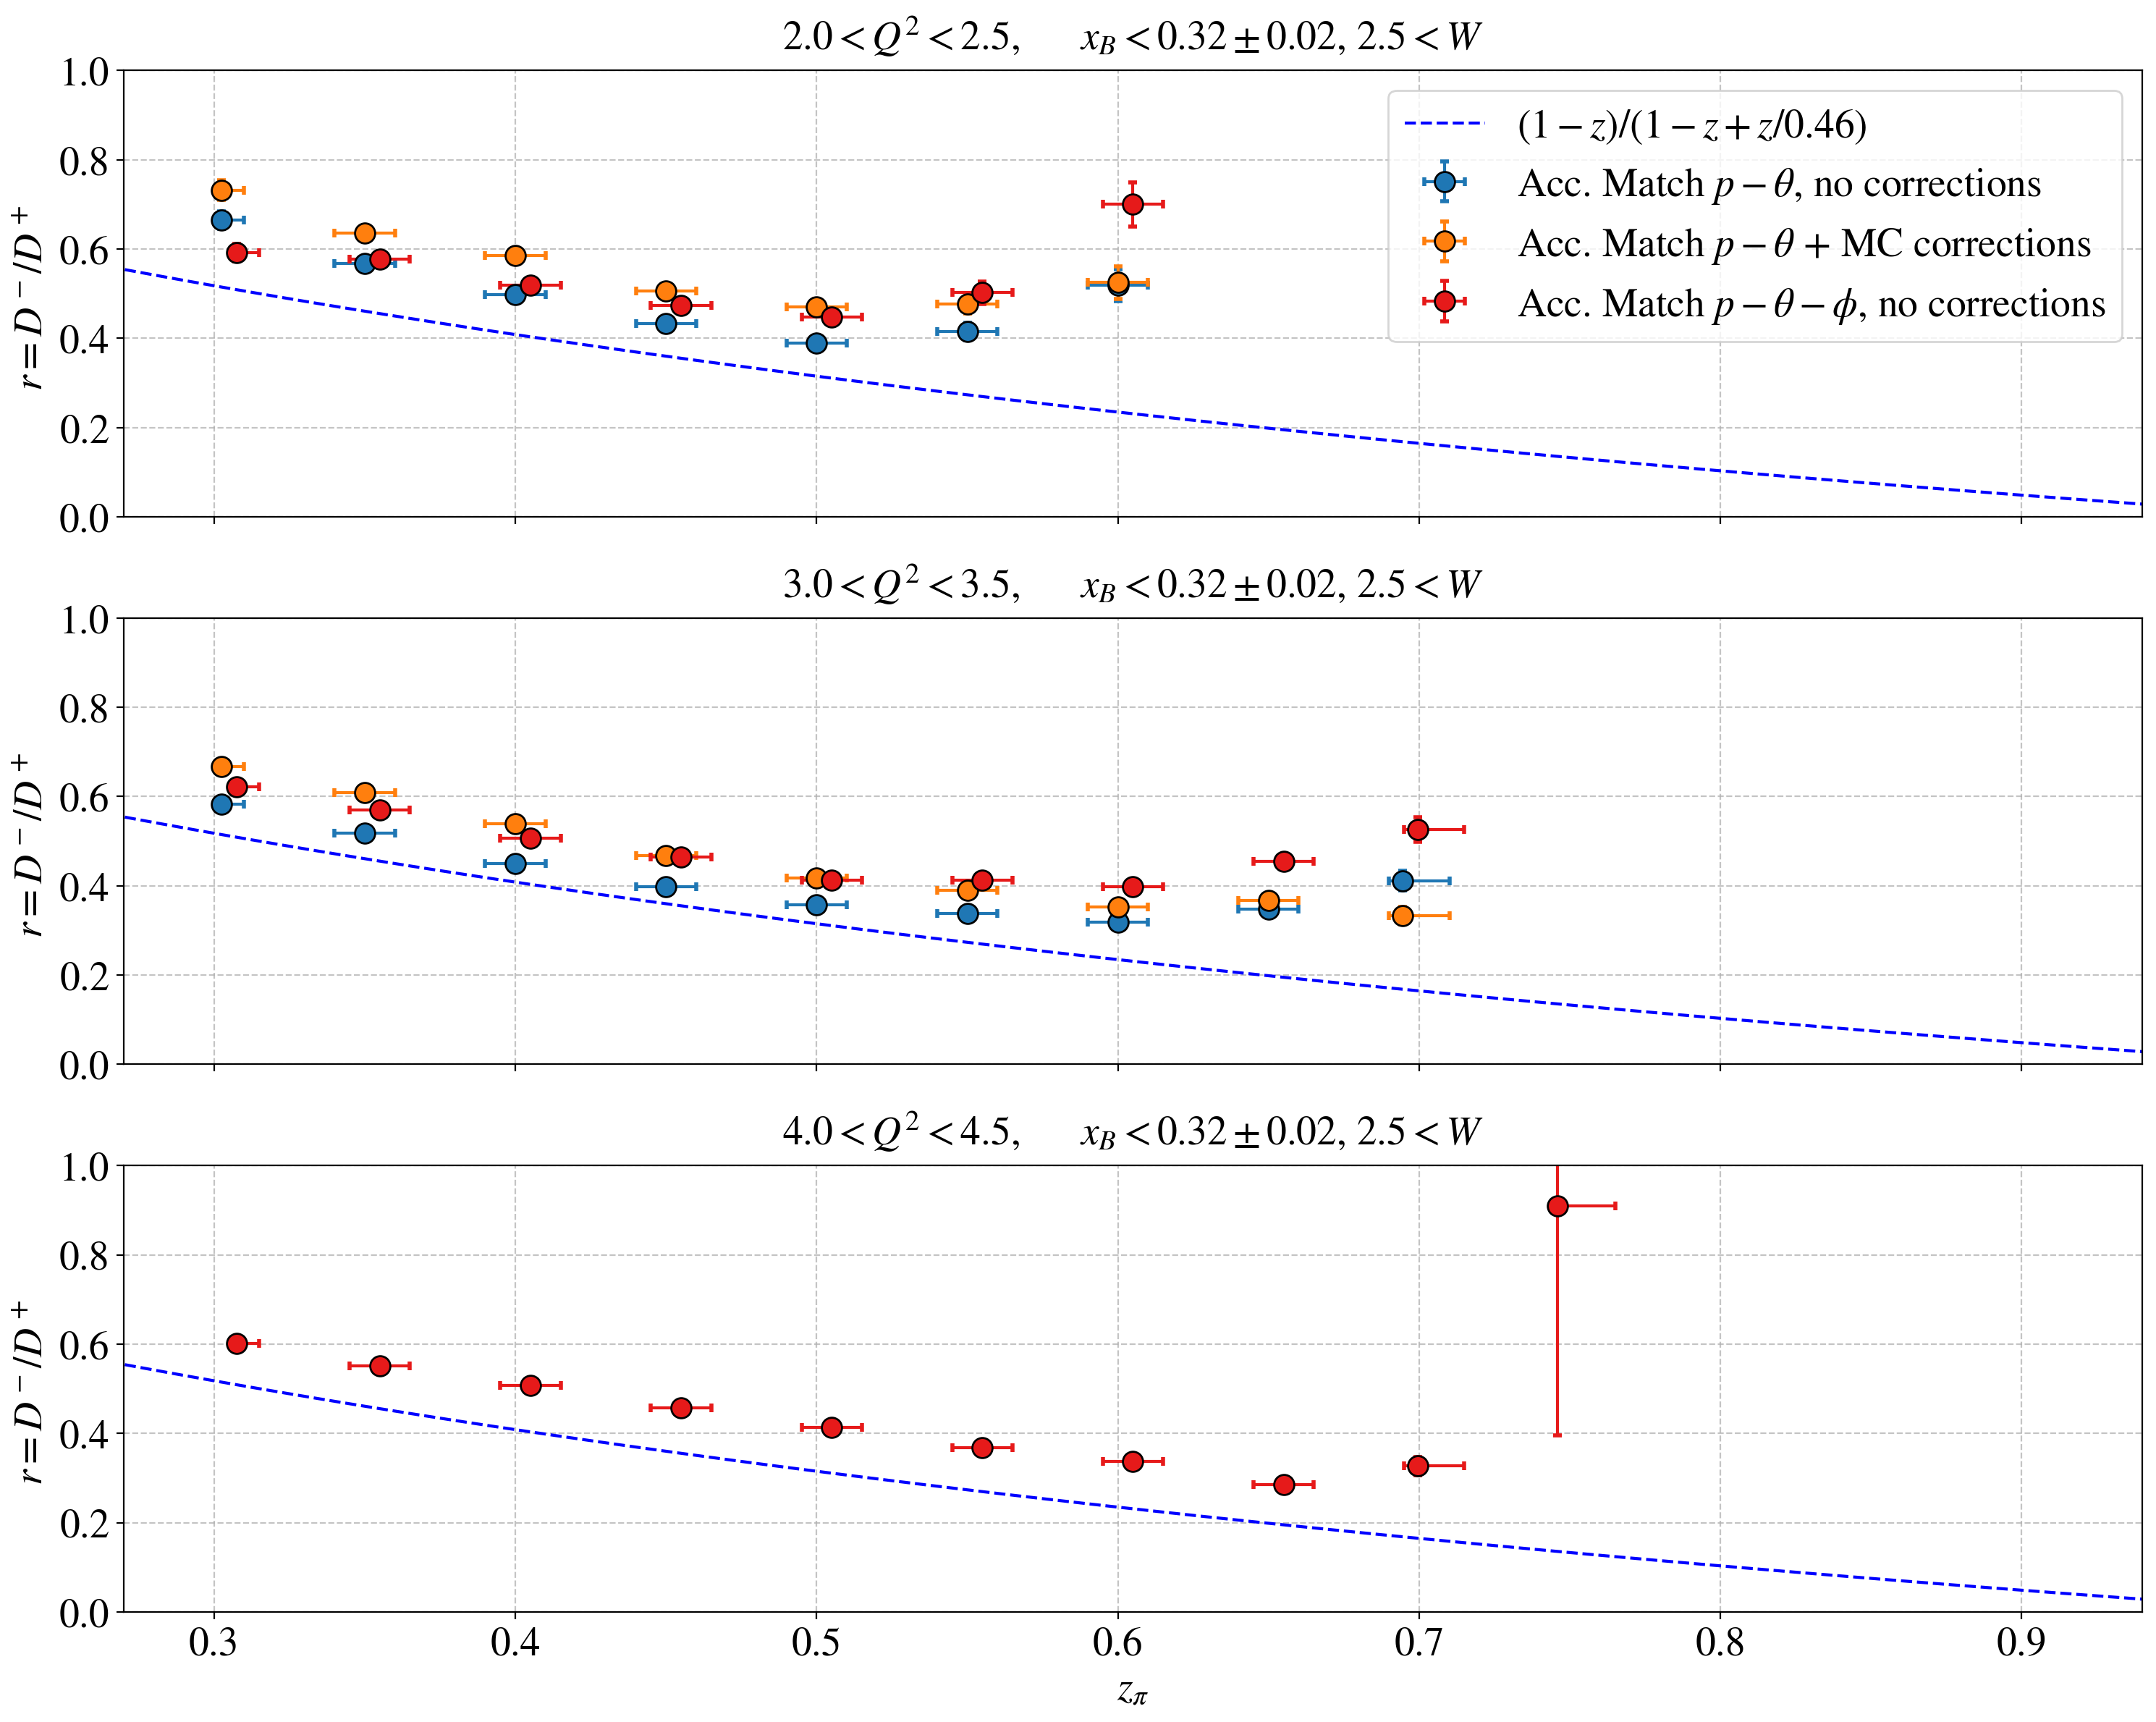

In [76]:
do_add_legend = True;
fig = plt.figure(figsize=(15,12), tight_layout=True);  
for idcs_2Plot,Q2_idx in zip([[0],[2],[4]],range(3)):
    Q2min_2Plot = np.array([2.0,2.5,3.0,3.5,4.0,4.5]); Q2max_2Plot = Q2min_2Plot + 0.5
    ax = fig.add_subplot(3,1,Q2_idx+1)
    # plot_existing_data('r'); 
    plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
    
    if len(idcs_2Plot)>0:
        for Q2min,Q2max in zip([Q2min_2Plot[idcs_2Plot]],[Q2max_2Plot[idcs_2Plot]]):
            suffix = 'bin_migration_acceptance_%.1f_Q2_%.1f'%(Q2min,Q2max)
            try: plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_arr[suffix],
                                       r_err = (r_errdw_arr[suffix] + r_errup_arr[suffix])/2,
                                       label = 'Acc. Match $p-\\theta$, no corrections', 
                                       ax    = ax, 
                                       do_add_fit_to_label=False);
            except: print('no data for',suffix)

            try: plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = 'Acc. Match $p-\\theta$ + MC corrections', 
                                       ax    = ax, 
                                       do_add_fit_to_label=False);
            except: print('no data for',suffix)
            
            suffix = '%.1f_Q2_%.1f'%(Q2min,Q2max)
            try: plot_r_vs_z_and_fit_to_rFF(z     = z_arr_AccMatch3D[suffix]+0.005,
                                       z_err = (z_errdw_arr_AccMatch3D[suffix],z_errup_arr_AccMatch3D[suffix]),
                                       r     = r_arr_AccMatch3D[suffix],
                                       r_err = (r_errup_arr_AccMatch3D[suffix] + r_errdw_arr_AccMatch3D[suffix])/2,
                                       label = 'Acc. Match $p-\\theta-\phi$, no corrections', 
                                       ax    = ax, 
                                       markerfacecolor=[0.9,0.1,0.1], color=[0.9,0.1,0.1],
                                       do_add_fit_to_label=False);            
            except: print('no data for',suffix)
            
    set_axes(ax,'$z_\\pi$' if Q2_idx==2 else '',
             "$r = D^-/D^+$ ", 
             title='$%.1f<Q^2<%.1f$,      $x_B<%.2f\pm%.2f$, $2.5 < W$'%(Q2min,Q2max,xB_selected, Delta_xB),
             remove_ticks_x=False if Q2_idx==2 else True,
             do_add_grid=True,
             do_add_legend=True if Q2_idx==0 else False, 
             xlim=xlim, ylim=ylim,fontsize=20);
    # if do_add_legend:
    #     ax.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)
    save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_accMatch_2D_vs_3D'%(xB_selected, Delta_xB,Q2min,Q2max) + '.pdf' )

## (1.1) Bins of $Q^2$

In [80]:
prefix      = 'Untagged_SIDIS_ratio_'
data_path = results_path + 'Q2_bins'
suffixes = ['_2.0_Q2_2.5','_2.5_Q2_3.0','_3.0_Q2_3.5',
            '_3.5_Q2_4.0','_4.0_Q2_4.5','_4.5_Q2_5.0',
            '_5.0_Q2_5.5','_5.5_Q2_6.0','_6.0_Q2_6.5']

### (1.1.1) specific $x_B$ value

#### x = 0.32

In [81]:
xB_selected = 0.32
Delta_xB    = 0.02
r_Results   = extract_r_from_SIDIS_ratio(data_path = data_path,                                                             
                                       prefix  = prefix,suffixes = suffixes, xB_selected = xB_selected,Delta_xB=Delta_xB, fdebug=0)

[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results

Done loading Untagged_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_10June2023/Q2_bins
For ['_2.0_Q2_2.5', '_2.5_Q2_3.0', '_3.0_Q2_3.5', '_3.5_Q2_4.0', '_4.0_Q2_4.5', '_4.5_Q2_5.0', '_5.0_Q2_5.5', '_5.5_Q2_6.0', '_6.0_Q2_6.5']


['bin_migration_acceptance_2.0_Q2_2.5']
Done loading Untagged_SIDIS_ratio_ SIDIS results and extracting r for x=0.32.
From /Users/erezcohen/Desktop/data/BAND/Results/Results_10June2023/Q2_bins_with_partial_corrections/
For ['bin_migration_acceptance_2.0_Q2_2.5']


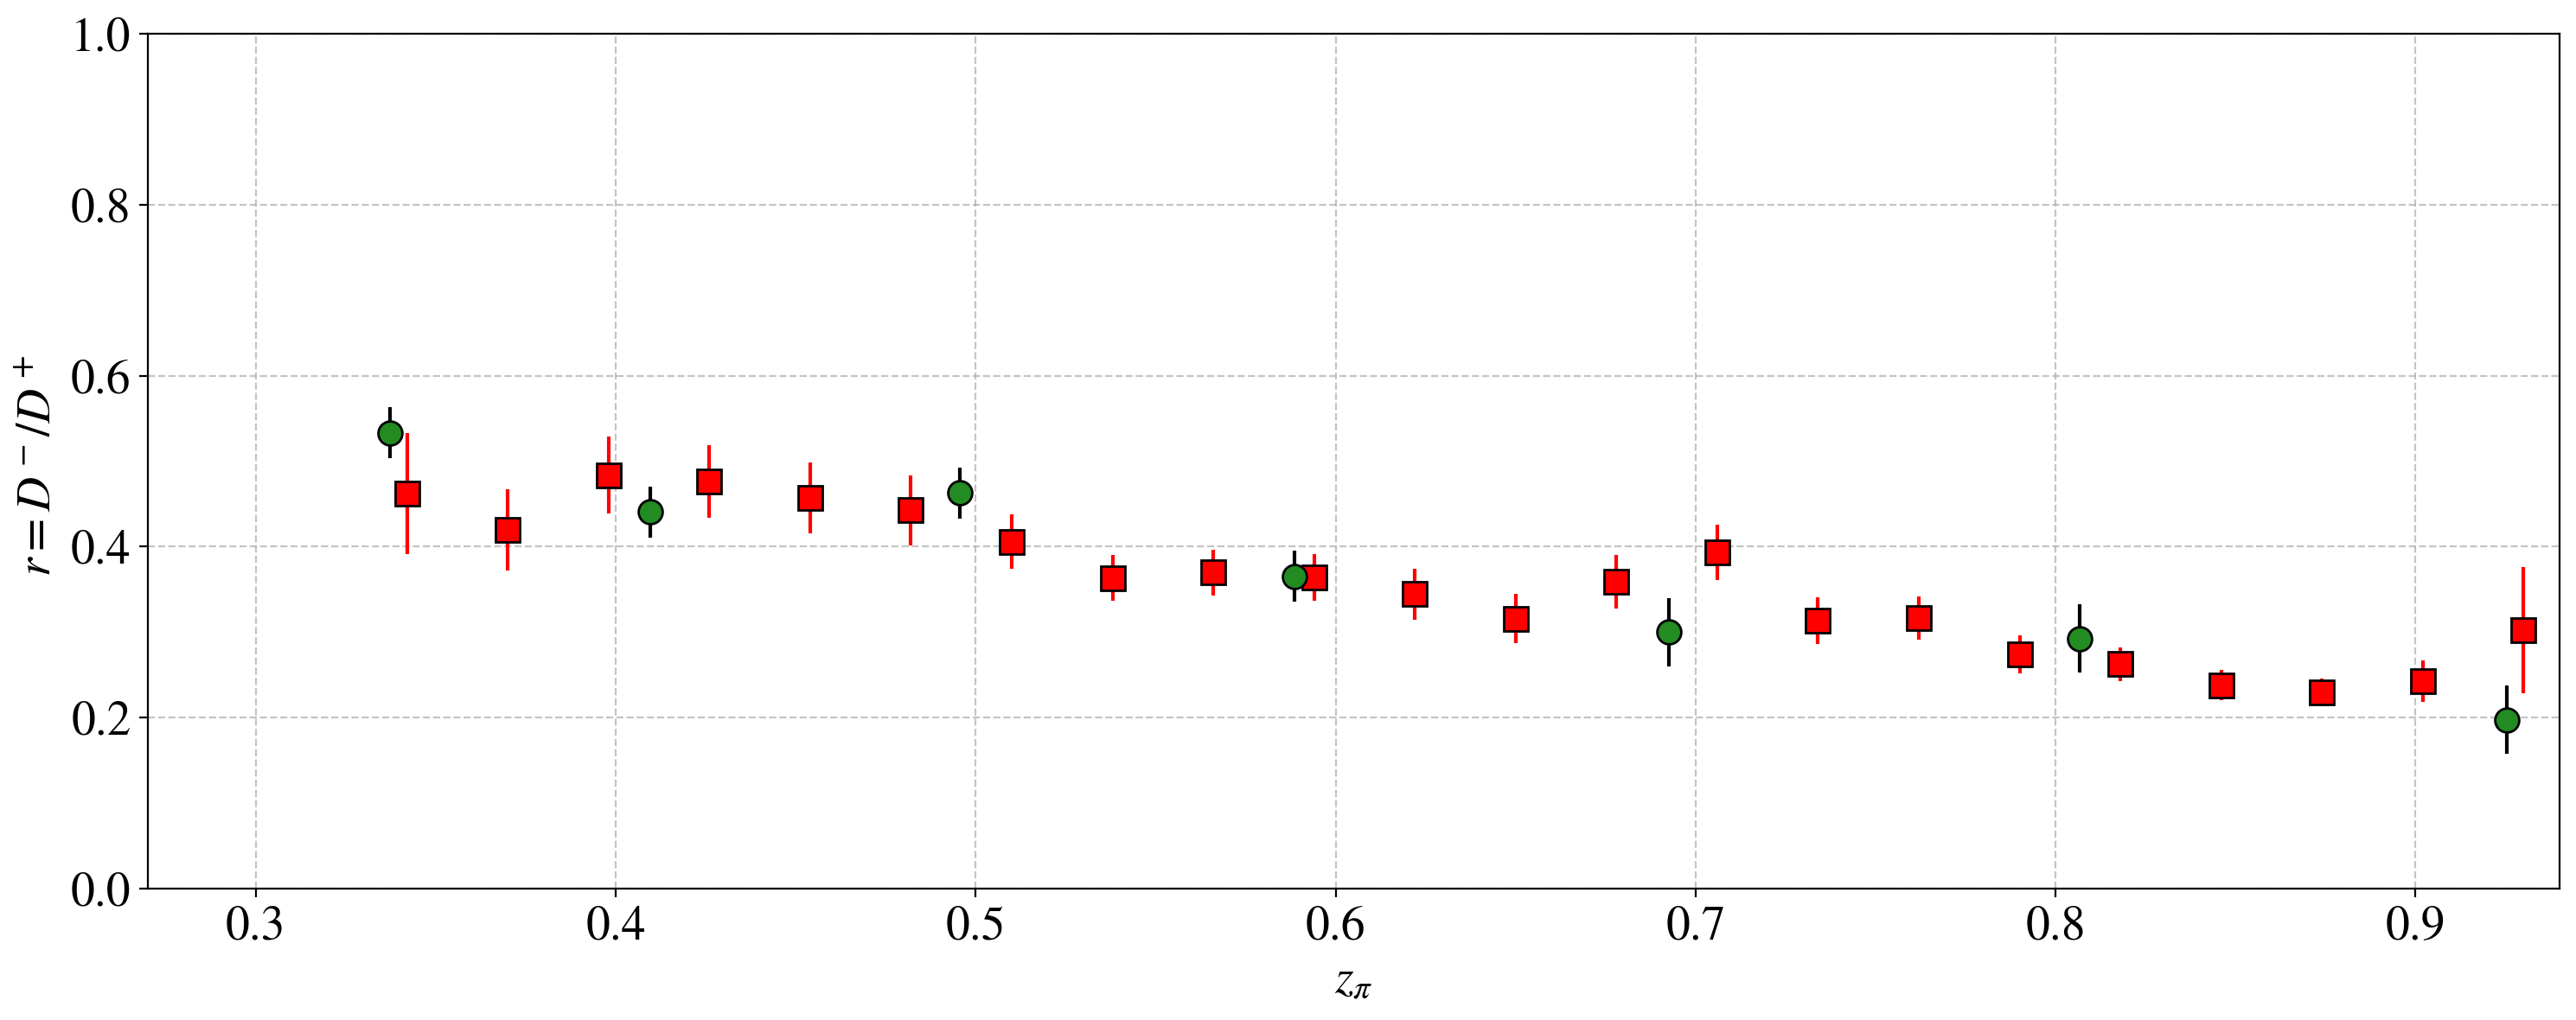

In [92]:
# !!!
# June-12, 2023
# This cell is Temporary, just for the June-13 SIDIS WG meeting presentation 
#
# !!!
data_path   = results_path + 'Q2_bins_with_partial_corrections/'
suffixes    = []
suffix   = 'bin_migration_acceptance_%.1f_Q2_%.1f'%(2,2.5)
suffixes.append(suffix)
    
print(suffixes)
r_Results = extract_r_from_SIDIS_ratio(data_path = data_path,
                                       prefix      = prefix,
                                       suffixes    = suffixes,
                                       xB_selected = xB_selected, 
                                       Delta_xB    = Delta_xB,
                                       fdebug      = 0 )
[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results

fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
plot_existing_data('r',do_JLAB2012=True,do_HERMES2000=True,do_Cornell77=False); 
# plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
# plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix], z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]), r     = r_corrected_arr[suffix],
#                                        r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,, ax    = ax,  do_add_fit_to_label=False);
set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=xlim, ylim=ylim,fontsize=20);

KeyError: '_2.0_Q2_2.5'

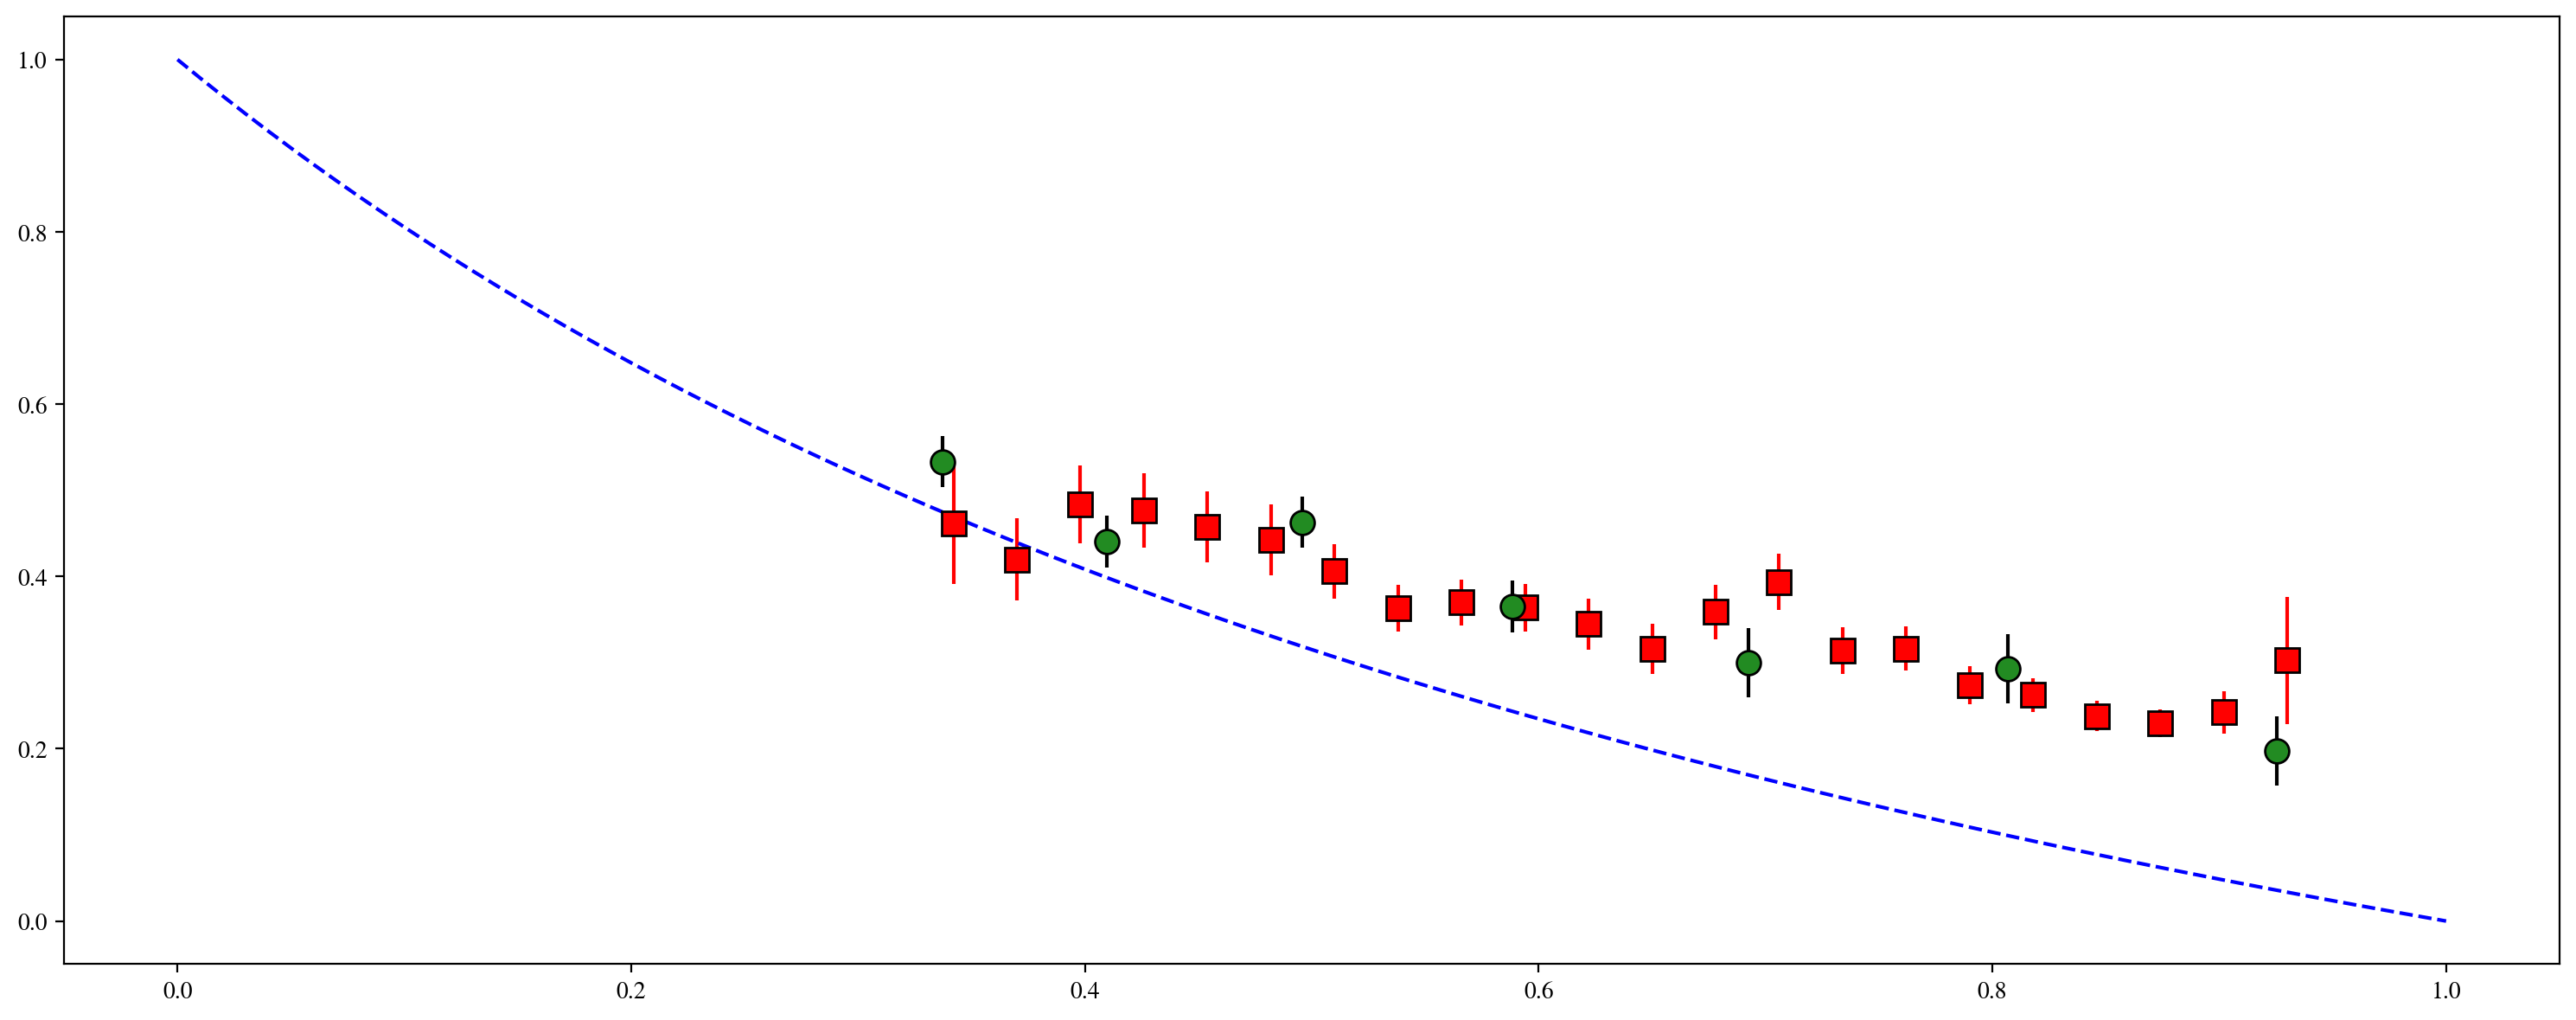

In [84]:
do_add_legend = False;
Q2min_2Plot = np.array([2.0,2.5,3.0,3.5,4.0,4.5]); Q2max_2Plot = Q2min_2Plot + 0.5
for idcs_2Plot in [[0],[1],[2],[3],[4],[5]]:
    fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
    plot_existing_data('r',do_Cornell77=False); 
    plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
    if len(idcs_2Plot)>0:
        for Q2min,Q2max in zip([Q2min_2Plot[idcs_2Plot]],[Q2max_2Plot[idcs_2Plot]]):
            suffix = '_%.1f_Q2_%.1f'%(Q2min,Q2max)
            result_label = ('This work, $x_B<%.2f\pm%.2f$, $%.1f<Q^2<%.1f$, $2.5 < W$'%(xB_selected, Delta_xB,Q2min,Q2max))
            
            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = result_label, 
                                       ax    = ax, 
                                       do_add_fit_to_label=False);
    set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=xlim, ylim=ylim,fontsize=20);
    if do_add_legend:
        ax.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)
    save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW'%(xB_selected, Delta_xB,Q2min,Q2max) + '.pdf' )

saved /Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/Results_rSIDIS/r_vs_z_x_0.32pm0.02_Q2_bins_allW.pdf


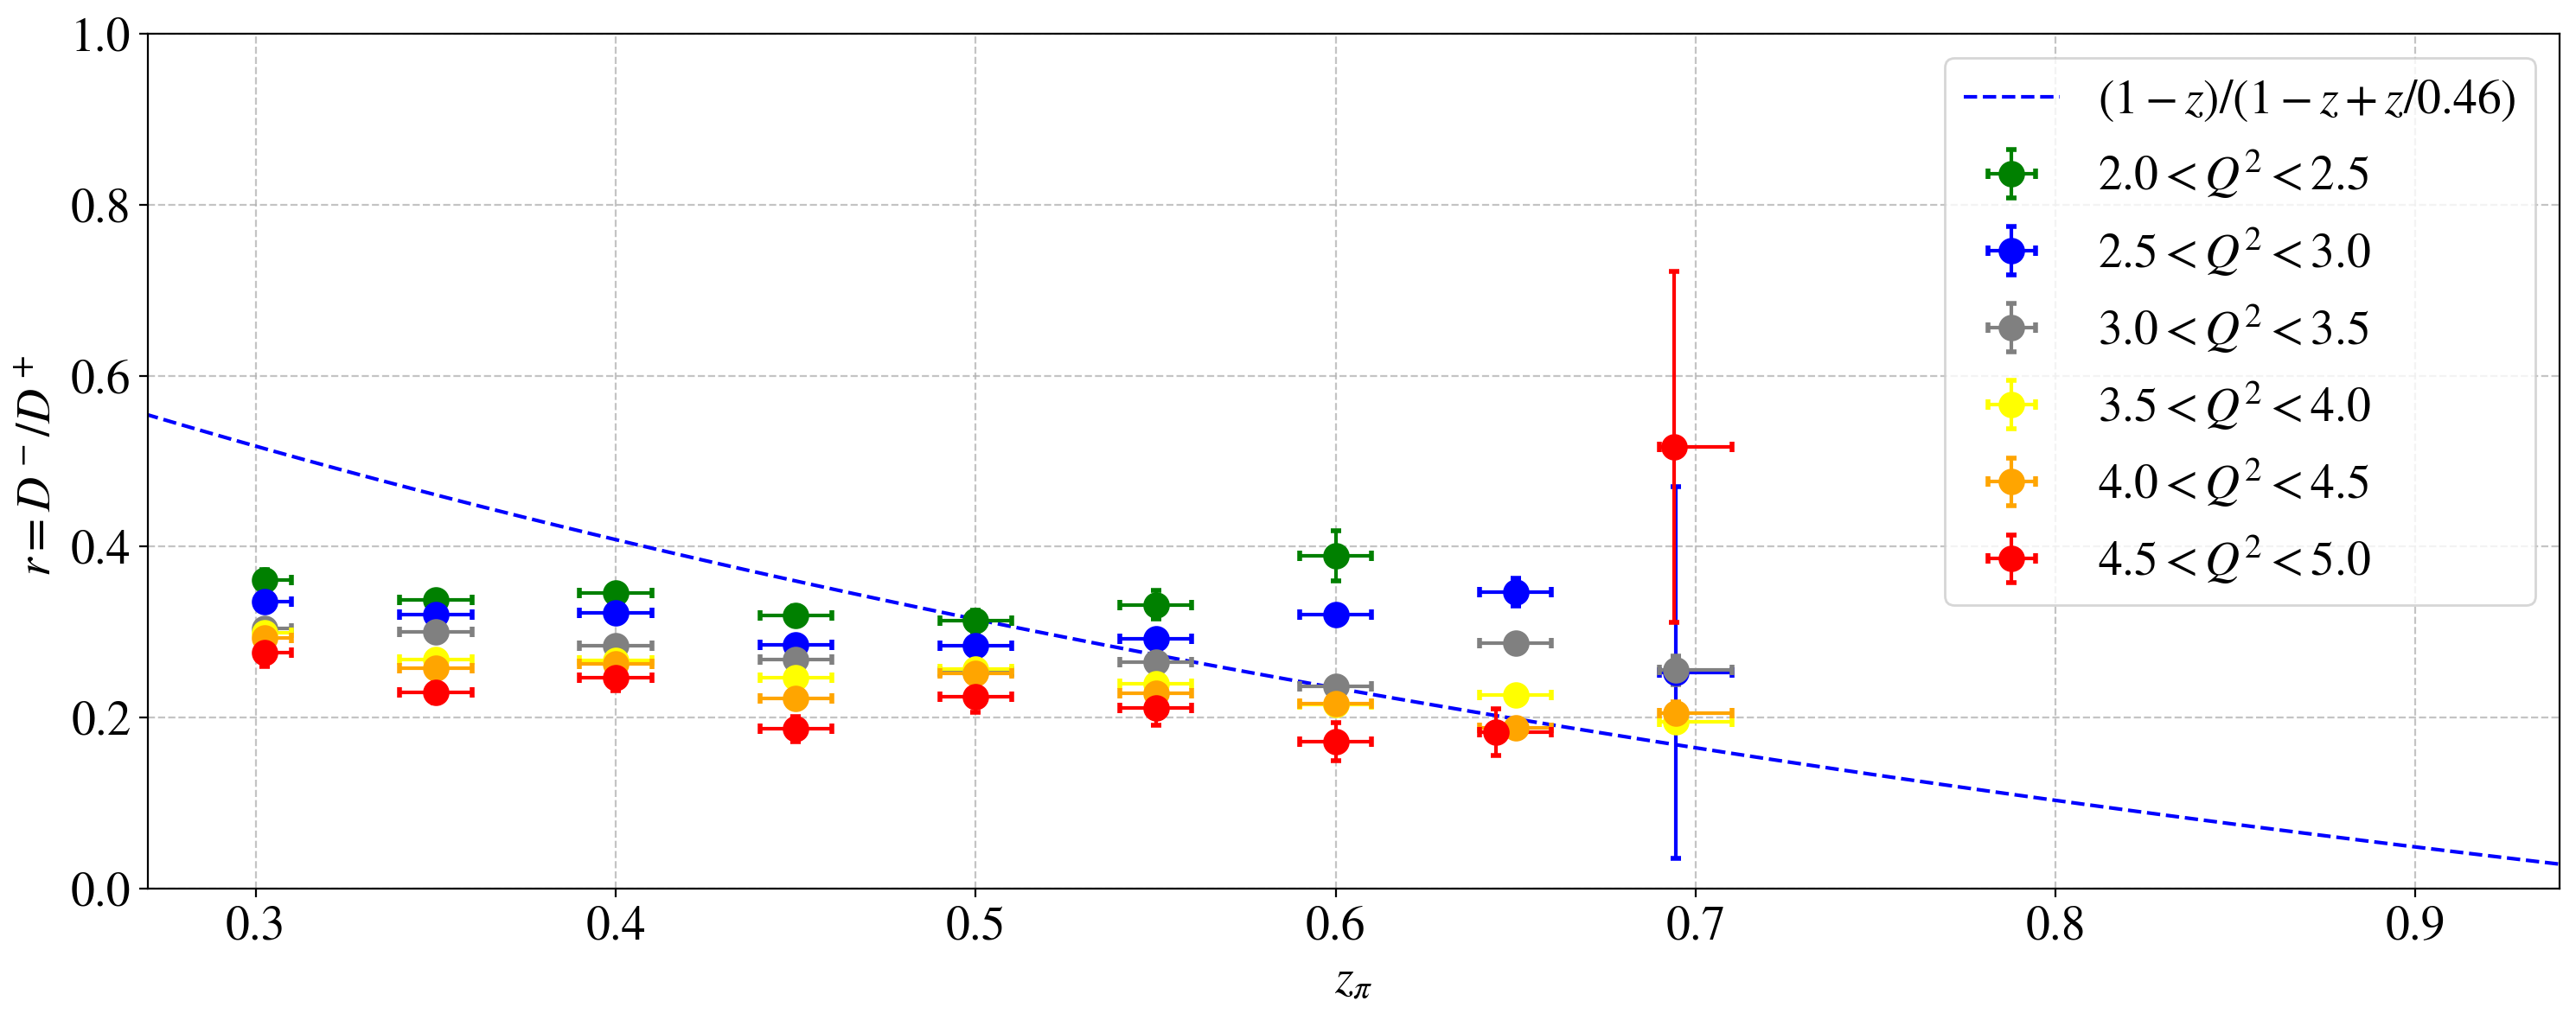

In [63]:
Q2colors = ['green','blue','gray','yellow','orange','red']
do_add_legend = True;
fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
plot_FF_expectation(ax=ax, formula='(1-z)/(1-z+z/0.46)')

for idcs_2Plot,Q2color in zip([[0],[1],[2],[3],[4],[5]],Q2colors):
    Q2min_2Plot = np.array([2.0,2.5,3.0,3.5,4.0,4.5]); Q2max_2Plot = Q2min_2Plot + 0.5
    
    if len(idcs_2Plot)>0:
        for Q2min,Q2max in zip([Q2min_2Plot[idcs_2Plot]],[Q2max_2Plot[idcs_2Plot]]):
            suffix = '_%.1f_Q2_%.1f'%(Q2min,Q2max)
            result_label = ('$%.1f<Q^2<%.1f$'%(Q2min,Q2max))
            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = result_label, 
                                       ax    = ax, 
                                       markerfacecolor = Q2color,markeredgecolor = Q2color,color=Q2color,
                                       do_add_fit_to_label=False);
    set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=xlim, ylim=ylim,fontsize=20);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_Q2_bins_allW'%(xB_selected, Delta_xB) + '.pdf' )

#### x = 0.28

In [ ]:
xB_selected = 0.28
Delta_xB    = 0.02
r_Results   = extract_r_from_SIDIS_ratio(data_path = data_path,                                                             
                                       prefix  = 'Untagged_SIDIS_ratio_',                                        
                                       suffixes = suffixes, xB_selected = xB_selected,Delta_xB=Delta_xB,
                                       fdebug=0)

[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results

In [ ]:
Q2colors = ['green','blue','gray','yellow','orange','red','brown']
do_add_legend = True;
fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
plot_FF_expectation(ax=ax, formula='(1-z)/(1-z+z/0.46)')
Q2min_2Plot = np.array([2.0,2.5,3.0,3.5,4.0,4.5,5.]); 
Q2max_2Plot = Q2min_2Plot + 0.5
for idcs_2Plot,Q2color in zip([0,1,2,3,4,5,6],Q2colors):    
    for Q2min,Q2max in zip([Q2min_2Plot[idcs_2Plot]],[Q2max_2Plot[idcs_2Plot]]):
        suffix = '_%.1f_Q2_%.1f'%(Q2min,Q2max)
        result_label = ('$%.1f<Q^2<%.1f$'%(Q2min,Q2max))
        try:
            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = result_label, 
                                       ax    = ax, 
                                       markerfacecolor = Q2color,markeredgecolor = Q2color,color=Q2color,
                                       do_add_fit_to_label=False);
        except:
            print('no data for',result_label)
set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=xlim, ylim=ylim,fontsize=20);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_Q2_bins_allW'%(xB_selected, Delta_xB) + '.pdf' )

#### x = 0.36

In [ ]:
xB_selected = 0.36
Delta_xB    = 0.02
r_Results   = extract_r_from_SIDIS_ratio(data_path = data_path,                                                             
                                       prefix  = 'Untagged_SIDIS_ratio_',                                        
                                       suffixes = suffixes, xB_selected = xB_selected,Delta_xB=Delta_xB,
                                       fdebug=0)

[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results

In [ ]:
Q2colors = ['green','blue','gray','yellow','orange','red','brown']
do_add_legend = True;
fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
plot_FF_expectation(ax=ax, formula='(1-z)/(1-z+z/0.46)')
Q2min_2Plot = np.array([2.0,2.5,3.0,3.5,4.0,4.5,5.]); 
Q2max_2Plot = Q2min_2Plot + 0.5
for idcs_2Plot,Q2color in zip([0,1,2,3,4,5,6],Q2colors):    
    for Q2min,Q2max in zip([Q2min_2Plot[idcs_2Plot]],[Q2max_2Plot[idcs_2Plot]]):
        suffix = '_%.1f_Q2_%.1f'%(Q2min,Q2max)
        result_label = ('$%.1f<Q^2<%.1f$'%(Q2min,Q2max))
        try:
            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = result_label, 
                                       ax    = ax, 
                                       markerfacecolor = Q2color,markeredgecolor = Q2color,color=Q2color,
                                       do_add_fit_to_label=False);
        except:
            print('no data for',result_label)
set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=xlim, ylim=ylim,fontsize=20);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_Q2_bins_allW'%(xB_selected, Delta_xB) + '.pdf' )

#### x = 0.44

In [ ]:
xB_selected = 0.44
Delta_xB    = 0.02
r_Results   = extract_r_from_SIDIS_ratio(data_path = data_path,                                                             
                                       prefix  = 'Untagged_SIDIS_ratio_',                                        
                                       suffixes = suffixes, xB_selected = xB_selected,Delta_xB=Delta_xB,
                                       fdebug=0)

[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results

In [ ]:
Q2colors = ['green','blue','gray','yellow','orange','red','brown','black','forestgreen']
do_add_legend = True;
fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
plot_FF_expectation(ax=ax, formula='(1-z)/(1-z+z/0.46)')
Q2min_2Plot = np.array([2.0,2.5,3.0,3.5,4.0,4.5,5.,5.5,6.]); 
Q2max_2Plot = Q2min_2Plot + 0.5
for idcs_2Plot,Q2color in zip([0,1,2,3,4,5,6,7,8],Q2colors):    
    for Q2min,Q2max in zip([Q2min_2Plot[idcs_2Plot]],[Q2max_2Plot[idcs_2Plot]]):
        suffix = '_%.1f_Q2_%.1f'%(Q2min,Q2max)
        result_label = ('$%.1f<Q^2<%.1f$'%(Q2min,Q2max))
        try:
            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = result_label, 
                                       ax    = ax, 
                                       markerfacecolor = Q2color,markeredgecolor = Q2color,color=Q2color,
                                       do_add_fit_to_label=False);
        except:
            print('no data for',result_label)
set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=xlim, ylim=ylim,fontsize=20);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_Q2_bins_allW'%(xB_selected, Delta_xB) + '.pdf' )

#### x = 0.4

In [ ]:
xB_selected = 0.4
Delta_xB    = 0.02
r_Results   = extract_r_from_SIDIS_ratio(data_path = data_path,                                                             
                                       prefix  = 'Untagged_SIDIS_ratio_',                                        
                                       suffixes = suffixes, xB_selected = xB_selected,Delta_xB=Delta_xB,
                                       fdebug=0)

[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results

In [ ]:
Q2colors = ['green','blue','gray','yellow','orange','red','brown','black']
do_add_legend = True;
fig = plt.figure(figsize=(15,6), tight_layout=True);  ax = fig.add_subplot(1,1,1)
plot_FF_expectation(ax=ax, formula='(1-z)/(1-z+z/0.46)')
Q2min_2Plot = np.array([2.0,2.5,3.0,3.5,4.0,4.5,5.,5.5]); 
Q2max_2Plot = Q2min_2Plot + 0.5
for idcs_2Plot,Q2color in zip([0,1,2,3,4,5,6,7],Q2colors):    
    for Q2min,Q2max in zip([Q2min_2Plot[idcs_2Plot]],[Q2max_2Plot[idcs_2Plot]]):
        suffix = '_%.1f_Q2_%.1f'%(Q2min,Q2max)
        result_label = ('$%.1f<Q^2<%.1f$'%(Q2min,Q2max))
        try:
            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = result_label, 
                                       ax    = ax, 
                                       markerfacecolor = Q2color,markeredgecolor = Q2color,color=Q2color,
                                       do_add_fit_to_label=False);
        except:
            print('no data for',result_label)
set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ", do_add_grid=True, do_add_legend=do_add_legend, xlim=xlim, ylim=ylim,fontsize=20);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_Q2_bins_allW'%(xB_selected, Delta_xB) + '.pdf' )

### (1.1.3) integrated over $x_B$

In [ ]:
xB_selected = 0.32
Delta_xB    = 0.7

r_Results = extract_r_from_SIDIS_ratio(data_path = data_path,                                                             
                                       prefix  = 'Untagged_SIDIS_ratio_',                                        
                                       suffixes = suffixes, xB_selected = xB_selected,Delta_xB=Delta_xB,
                                       fdebug=0)

[z_arr_all_xB,z_errdw_arr_all_xB,z_errup_arr_all_xB, 
 r_arr_all_xB, r_errup_arr_all_xB, r_errdw_arr_all_xB, 
 r_corrected_arr_all_xB, r_corrected_errup_arr_all_xB, r_corrected_errdw_arr_all_xB] = r_Results

In [ ]:
for suffix in suffixes:
    # print(suffix)
    z_arr['all xB ' + suffix]       = z_arr_all_xB[suffix]
    z_errdw_arr['all xB ' + suffix]     = z_errdw_arr_all_xB[suffix]
    z_errup_arr['all xB ' + suffix]     = z_errup_arr_all_xB[suffix]
    r_arr['all xB ' + suffix]       = r_arr_all_xB[suffix]
    r_errup_arr['all xB ' + suffix] = r_errup_arr_all_xB[suffix]
    r_errdw_arr['all xB ' + suffix] = r_errdw_arr_all_xB[suffix]
    r_corrected_arr['all xB ' + suffix]       = r_corrected_arr_all_xB[suffix]
    r_corrected_errup_arr['all xB ' + suffix] = r_corrected_errup_arr_all_xB[suffix]
    r_corrected_errdw_arr['all xB ' + suffix] = r_corrected_errdw_arr_all_xB[suffix]    

In [ ]:
for idcs_2Plot in [[0],[1],[2],[3],[4],[5],[6],[7]]:
    Q2min_2Plot = np.array([2.0,2.5,3.0,4.0,4.5,5,5.5,6.,6.5]); Q2max_2Plot = Q2min_2Plot + 0.5
    for Q2min,Q2max in zip([Q2min_2Plot[idcs_2Plot]],[Q2max_2Plot[idcs_2Plot]]):
        suffix = 'all xB ' + '_%.1f_Q2_%.1f'%(Q2min,Q2max)
        result_label = ('This work,\nall $x_B$, $%.1f<Q^2<%.1f$ (GeV/c)$^2$, $2.5$ GeV/c$^2 < W$'%(Q2min,Q2max))
        try:
            fig = plt.figure(figsize=(15,6), tight_layout=True); ax = fig.add_subplot(1,1,1)
            plot_existing_data('r'); plot_FF_expectation(ax=ax)

            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix],
                                   z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                   r     = r_corrected_arr[suffix],
                                   r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                   label = result_label, 
                                       ax=ax);
            set_axes(ax,'$z_\\pi$',"$r = D^-/D^+$ ",do_add_grid=True, do_add_legend=False, xlim=xlim, ylim=ylim,fontsize=20);
            save_figure( filename = figures_path + 'r_vs_z_all_x_%.1f_Q2_%.1f_allW'%(Q2min,Q2max) + '.pdf' )
        except:
            print('no r data for ',suffix)


## (1.2) Comparison between different run periods

In [ ]:
xB_selected = 0.32
Delta_xB    = 0.7

data_path = results_path + 'DifferentBeamEnergies/'
Q2_min,Q2_max = 4.0,4.5
suffixes  = []
for E in [10.2,10.4 ,10.6]:    
    label = '_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(E,Q2_min,Q2_max)
    suffixes.append(label)
r_Results = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                           prefix  = 'Untagged_SIDIS_ratio_',                                            
                                           suffixes = suffixes,                                           
                                           xB_selected = xB_selected,                                            
                                           Delta_xB = Delta_xB,                                           
                                           fdebug=0);
[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results
print('done.')        

In [ ]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
for E,E_idx in zip([10.2,10.4 ,10.6],[1,2,3]):
    suffix = '_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(E,Q2_min,Q2_max)
    plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+E_idx*0.001,
                               z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                               r     = r_corrected_arr[suffix],
                               r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                               label = '$E_{beam} = %.1f$ GeV'%E, ax=ax,
                               do_add_fit_to_label=False);
set_axes(ax,'$z_\pi$',
         "$r(z) =D^-/D^+$ ",
         title  = "$r(z)$ relative to 10.2 GeV for $%.2f < x_B < %.2f$, and $%.1f < Q^2 < %.1f$ "%( 0.15, 0.6, Q2_min, Q2_max),
         do_add_grid=True, do_add_legend=True, 
         xlim=(0.29,0.81),
         ylim=(0,1),fontsize=18);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_differentEbeam'%(xB_selected, Delta_xB, Q2_min,Q2_max) + '.pdf' )

# plt.legend(bbox_to_anchor=(1.,1.05));
# print(compute_chi2_between_two_r_vs_z(r_corrected_arr['_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.2,Q2_min,Q2_max)], 
#                                       r_corrected_errdw_arr['_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.2,Q2_min,Q2_max)], 
#                                       r_corrected_arr['_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.4,Q2_min,Q2_max)], 
#                                       r_corrected_errdw_arr['_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.4,Q2_min,Q2_max)],  ))

# print(compute_chi2_between_two_r_vs_z(r_corrected_arr['_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.2,Q2_min,Q2_max)], 
#                                       r_corrected_errdw_arr['_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.2,Q2_min,Q2_max)], 
#                                       r_corrected_arr['_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.6,Q2_min,Q2_max)], 
#                                       r_corrected_errdw_arr['_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.6,Q2_min,Q2_max)],  ))

In [ ]:
fig = plt.figure(figsize=(15,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
suffix_102GeV = '_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(10.2,Q2_min,Q2_max)
r_ref  = r_corrected_arr[suffix_102GeV]
dr_ref = (r_corrected_errdw_arr[suffix_102GeV] + r_corrected_errup_arr[suffix_102GeV])/2

plt.plot([0,1],[1,1],'--k')
for E,E_idx in zip([10.4 ,10.6],[2,3]):
    suffix = '_E_%.1fGeV_%.1f_Q2_%.1f_GeV'%(E,Q2_min,Q2_max)
    
    z  = z_arr[suffix]+E_idx*0.005
    r  = r_corrected_arr[suffix]
    dr = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2
    R_r_to_ref  = r / r_ref
    dR_r_to_ref = R_r_to_ref * np.sqrt(np.square(dr/r) + np.square(dr_ref/r_ref))
    # omit points where r is not defined
    for i in range(len(r)):
        if r[i] == r_ref[i]:
            R_r_to_ref[i] = 0
    ax.errorbar( x=z , y=R_r_to_ref, yerr=dR_r_to_ref, marker='o', markersize=10, label='$%.1f$ GeV/$10.2$ GeV'%E,
                capsize=2, capthick=2, markeredgecolor='k', linestyle='None' )

    set_axes(ax,'$z_\pi$',
         "$r(z) \;/ \;r(z, E_{beam}=10.2 \; GeV) $ ",
         title  = "$r(z)$ for $%.2f < x_B < %.2f$, and $%.1f < Q^2 < %.1f$ "%( 0.15, 0.6, Q2_min, Q2_max),
         do_add_grid=True, do_add_legend=True, 
         xlim=(0.29,0.81),
         ylim=(0.8,1.3),
         fontsize=20);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_differentEbeam_ratio'%(xB_selected, Delta_xB, Q2_min,Q2_max) + '.pdf' )

## (1.3) Different electron sector

In [ ]:
xB_selected = 0.32
Delta_xB    = 0.02

data_path = results_path + 'DifferentElectronSector/'
Q2_min,Q2_max = 4.0,4.5
suffixes  = []
for eSector in np.arange(1,7,1):
    label = '_e_Sector_%d_%.1f_Q2_%.1f_GeV'%(eSector,Q2_min,Q2_max)
    suffixes.append(label)
r_Results = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                           prefix  = 'Untagged_SIDIS_ratio_',                                            
                                           suffixes = suffixes,                                           
                                           xB_selected = xB_selected, Delta_xB = Delta_xB, fdebug=0);
[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results
print('done.')        

In [ ]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
# plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
for eSector in np.arange(1,7,1):
    suffix = '_e_Sector_%d_%.1f_Q2_%.1f_GeV'%(eSector,Q2_min,Q2_max)
    plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+eSector*0.001,
                               z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                               r     = r_corrected_arr[suffix],
                               r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                               label = '$e$ in Sector %d'%eSector, ax=ax,
                               do_plot_fit=False, do_add_fit_to_label=False);
set_axes(ax,'$z_\pi$',
         "$r(z) =D^-/D^+$ ",
         title  = "$r(z)$ for $%.2f < x_B < %.2f$ and $%.1f < Q^2 < %.1f$ "%( xB_selected-Delta_xB, xB_selected+Delta_xB, Q2_min, Q2_max),
         do_add_grid=True, do_add_legend=True, 
         xlim=(0.29,0.81),
         ylim=(0,1),fontsize=18);

save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_different_eSector'%(xB_selected, Delta_xB, Q2_min,Q2_max) + '.pdf' )

In [ ]:
fig = plt.figure(figsize=(15,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
suffix_ref = suffix = '_e_Sector_%d_%.1f_Q2_%.1f_GeV'%(1,Q2_min,Q2_max)
r_ref  = r_corrected_arr[suffix_ref]
dr_ref = (r_corrected_errdw_arr[suffix_ref] + r_corrected_errup_arr[suffix_ref])/2

plt.plot([0,1],[1,1],'--k')
for eSector in np.arange(1,7,1):
    suffix = '_e_Sector_%d_%.1f_Q2_%.1f_GeV'%(eSector,Q2_min,Q2_max)
    
    z  = z_arr[suffix]+eSector*0.001
    r  = r_corrected_arr[suffix]
    dr = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2
    R_r_to_ref  = r / r_ref
    dR_r_to_ref = R_r_to_ref * np.sqrt(np.square(dr/r) + np.square(dr_ref/r_ref))
    # omit points where r is not defined 
    for i in range(len(r)):
        if r[i] == r_ref[i]:
            R_r_to_ref[i] = 0
    ax.errorbar( x=z , y=R_r_to_ref, yerr=dR_r_to_ref, marker='o', markersize=10, label='Sector %d/Sector 1'%eSector,
                capsize=2, capthick=2, markeredgecolor='k', linestyle='None' )

    set_axes(ax,'$z_\pi$',
             "$r(z) \;/ \;r(z, e-sector\; 1) $ ",
             title  = "$r(z)$ relative to e-Sector 1 for $%.2f < x_B < %.2f$ and $%.1f < Q^2 < %.1f$ "%( xB_selected-Delta_xB, xB_selected+Delta_xB, Q2_min, Q2_max),
             do_add_grid=True, do_add_legend=True, 
             xlim=(0.29,0.81),
             ylim=(0.6,1.5),
             fontsize=20);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_different_eSector_ratio'%(xB_selected, Delta_xB, Q2_min,Q2_max) + '.pdf' )

## (1.4) Different pion sector

In [ ]:
xB_selected = 0.32
Delta_xB    = 0.02

data_path = results_path + 'DifferentPiSector/'
Q2_min,Q2_max = 4.0,4.5
suffixes  = []
for PiSector in np.arange(1,7,1):
    label = '_Pi_Sector_%d_%.1f_Q2_%.1f_GeV'%(PiSector,Q2_min,Q2_max)
    suffixes.append(label)
r_Results = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                           prefix  = 'Untagged_SIDIS_ratio_',                                            
                                           suffixes = suffixes,                                           
                                           xB_selected = xB_selected, Delta_xB = Delta_xB, fdebug=0);
[z_arr,z_errdw_arr,z_errup_arr, 
 r_arr, r_errup_arr, r_errdw_arr, 
 r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = r_Results
print('done.')        

In [ ]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
# plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
for PiSector in np.arange(1,7,1):
    suffix = '_Pi_Sector_%d_%.1f_Q2_%.1f_GeV'%(PiSector,Q2_min,Q2_max)
    plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+PiSector*0.001,
                               z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                               r     = r_corrected_arr[suffix],
                               r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                               label = '$\pi$ in Sector %d'%PiSector, ax=ax,
                               do_plot_fit=False, do_add_fit_to_label=False);
set_axes(ax,'$z_\pi$',
         "$r(z) =D^-/D^+$ ",
         title  = "$r(z)$ for $%.2f < x_B < %.2f$ and $%.1f < Q^2 < %.1f$ "%( xB_selected-Delta_xB, xB_selected+Delta_xB, Q2_min, Q2_max),
         do_add_grid=True, do_add_legend=True, 
         xlim=(0.29,0.81),
         ylim=(0,1),fontsize=18);

save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_different_PiSector'%(xB_selected, Delta_xB, Q2_min,Q2_max) + '.pdf' )

In [ ]:
fig = plt.figure(figsize=(15,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
suffix_ref = suffix = '_Pi_Sector_%d_%.1f_Q2_%.1f_GeV'%(1,Q2_min,Q2_max)
r_ref  = r_corrected_arr[suffix_ref]
dr_ref = (r_corrected_errdw_arr[suffix_ref] + r_corrected_errup_arr[suffix_ref])/2

plt.plot([0,1],[1,1],'--k')
for PiSector in np.arange(1,7,1):
    suffix = '_Pi_Sector_%d_%.1f_Q2_%.1f_GeV'%(PiSector,Q2_min,Q2_max)
    
    z  = z_arr[suffix]+PiSector*0.001
    r  = r_corrected_arr[suffix]
    dr = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2
    R_r_to_ref  = r / r_ref
    dR_r_to_ref = R_r_to_ref * np.sqrt(np.square(dr/r) + np.square(dr_ref/r_ref))
    # omit points where r is not defined 
    for i in range(len(r)):
        if r[i] == r_ref[i]:
            R_r_to_ref[i] = 0
    ax.errorbar( x=z , y=R_r_to_ref, yerr=dR_r_to_ref, marker='o', markersize=10, label='Sector %d/Sector 1'%PiSector,
                capsize=2, capthick=2, markeredgecolor='k', linestyle='None' )

    set_axes(ax,'$z_\pi$',
             "$r(z) \;/ \;r(z, e-sector\; 1) $ ",
             title  = "$r(z)$ relative to $\pi$-Sector 1 for $%.2f < x_B < %.2f$ and $%.1f < Q^2 < %.1f$ "%( xB_selected-Delta_xB, xB_selected+Delta_xB, Q2_min, Q2_max),
             do_add_grid=True, do_add_legend=True, 
             xlim=(0.29,0.81),
             ylim=(0.7,1.8),
             fontsize=20);
save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_different_PiSector_ratio'%(xB_selected, Delta_xB, Q2_min,Q2_max) + '.pdf' )

## (1.4) Dependence on $p_T$

In [ ]:
xB_selected = 0.32

In [ ]:
pT_min_arr = np.arange(0,1.2,0.3)
pT_max_arr = pT_min_arr + 0.3
pT_min_arr, pT_max_arr

for Q2min,Q2max in zip([2.,3.,4.],[2.5,3.5,4.5]):
    data_path= results_path + 'pT_bins_%.1f_Q2_%.1f/'%(Q2min,Q2max)
    suffixes  = []
    for pT_min, pT_max in zip(pT_min_arr, pT_max_arr):
        suffix   = '_%.2f_pT_%.2f'%(pT_min,pT_max)
        suffixes.append(suffix)
    Res = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                               prefix  = 'Untagged_SIDIS_ratio_',                                            
                                               suffixes = suffixes,                                           
                                               xB_selected = xB_selected,                                            
                                               Delta_xB = Delta_xB,                                           
                                               fdebug=0);
    [z_arr,z_errdw_arr,z_errup_arr, r_arr, r_errup_arr, r_errdw_arr,  
     r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = Res
    
    fig = plt.figure(figsize=(15,6), tight_layout=True)
    ax = fig.add_subplot(1,1,1)
    plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
    for pT_min, pT_max,pT_idx in zip(pT_min_arr, pT_max_arr,range(len(pT_min_arr))):
        suffix   = '_%.2f_pT_%.2f'%(pT_min,pT_max)
        try:
            plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+pT_idx*0.001,
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_corrected_arr[suffix],
                                       r_err = (r_corrected_errdw_arr[suffix] + r_corrected_errup_arr[suffix])/2,
                                       label = '$%.1f < p_T < %.1f$ GeV/c'%(pT_min,pT_max), 
                                       ax    = ax, 
                                       do_add_fit_to_label=False);
        except:
            print('no r data')
    set_axes(ax,'$z_\pi$',
             "$r(z) =D^-/D^+$ ",
             title  = "$r(z)$ for $%.2f < x_B < %.2f$ and $%.1f < Q^2 < %.1f$ "%( xB_selected-Delta_xB, xB_selected+Delta_xB, Q2min, Q2max),
             do_add_grid=True, do_add_legend=True, 
             xlim=(0.29,0.81),
             ylim=(0,1),fontsize=22);
    # plt.legend(bbox_to_anchor=(1.,1.05),loc='best',fontsize=18)
    save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_different_pT'%(xB_selected, Delta_xB, Q2min,Q2max) + '.pdf' )
    
print('done.')        

## (1.5) Dependence on $\phi_\pi$

In [ ]:
fdebug=0
for Q2min,Q2max in zip([2.,3.,4.],[2.5,3.5,4.5]):
    data_path= results_path + 'phi_bins_%.1f_Q2_%.1f/'%(Q2min,Q2max)

    phi_min_arr = np.arange(-np.pi,np.pi-np.pi/3,np.pi/3)
    phi_max_arr = phi_min_arr + np.pi/3
    suffixes  = []
    for phi_min, phi_max in zip(phi_min_arr, phi_max_arr):
        suffix   = '_%.2f_phi_%.2f'%(phi_min,phi_max)
        suffixes.append(suffix)
    Res = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                               prefix  = 'Untagged_SIDIS_ratio_',                                            
                                               suffixes = suffixes,                                           
                                               xB_selected = xB_selected,                                            
                                               Delta_xB = Delta_xB,                                           
                                               fdebug=0);
    [z_arr,z_errdw_arr,z_errup_arr, r_arr, r_errup_arr, r_errdw_arr,
     r_corrected_arr, r_corrected_errup_arr, r_corrected_errdw_arr] = Res
    print('done.')   
    
    
    fig = plt.figure(figsize=(15,6), tight_layout=True)
    ax = fig.add_subplot(1,1,1)
    plot_FF_expectation(ax=ax,formula='(1-z)/(1-z+z/0.46)')
    for phi_min, phi_max, phi_idx in zip(phi_min_arr, phi_max_arr,range(len(phi_min_arr))):
        suffix   = '_%.2f_phi_%.2f'%(phi_min,phi_max)
        try:
            l = plot_r_vs_z_and_fit_to_rFF(z     = z_arr[suffix]+phi_idx*0.001,
                                       z_err = (z_errdw_arr[suffix],z_errup_arr[suffix]),
                                       r     = r_arr[suffix],
                                       r_err = (r_errdw_arr[suffix] + r_errup_arr[suffix])/2,
                                       label = '$%.1f^{\circ} < \phi_\pi < %.1f^{\circ}$'%(phi_min*180/np.pi,phi_max*180/np.pi), 
                                       ax    = ax, 
                                       fdebug=fdebug,
                                           do_add_fit_to_label=False);
        except:
            print(suffix,'no r data')
            
    set_axes(ax,'$z_\pi$',
             "$r(z) =D^-/D^+$ ",
             title  = "$r(z)$ for $%.2f < x_B < %.2f$ and $%.1f < Q^2 < %.1f$ "%( xB_selected-Delta_xB, xB_selected+Delta_xB, Q2min,Q2max),
             do_add_grid=True, do_add_legend=True, 
             xlim=(0.29,0.81),
             ylim=(0,1),fontsize=22);
    plt.legend(bbox_to_anchor=(1.,1.05),loc='best',fontsize=18)
    save_figure( filename = figures_path + 'r_vs_z_x_%.2fpm%.2f_%.1f_Q2_%.1f_allW_different_phi_pi'%(xB_selected, Delta_xB, Q2min,Q2max) + '.pdf' )

## (1.6) (Weak) dependence on $W$ at high $Q^2$ 

In [ ]:
data_path = results_path + '/Q2_and_W_bins'
suffixes = ['_3.6_Q2_8.0____2.5_W_2.8',
            '_3.6_Q2_8.0____2.8_W_3.1',
            '_3.6_Q2_8.0____3.1_W_3.4']
xB_selected = 0.32
Delta_xB=0.02
z_arr,z_errdw_arr,z_errup_arr, r_arr, r_errup_arr, r_errdw_arr = extract_r_from_SIDIS_ratio(data_path = data_path, 
                                                                                            prefix  = 'Untagged_SIDIS_ratio_', 
                                                                                            suffixes = suffixes,
                                                                                            xB_selected = xB_selected, 
                                                                                            Delta_xB=Delta_xB,
                                                                                            fdebug=0)
# r_arr, r_errup_arr

### (1.5.1) specific $x_B$ value

In [ ]:
Q2min,Q2max = 3.6,8.0
Wmin_arr    = [2.5,2.8,3.1]
Wmax_arr    = [2.8,3.1,3.4]

fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

# plot_existing_data('r')
plot_FF_expectation(ax=ax)

for Wmin,Wmax in zip(Wmin_arr,Wmax_arr):
    result_name = '_%.1f_Q2_%.1f____%.1f_W_%.1f'%(Q2min,Q2max,Wmin,Wmax)
    result_label = ('This work,\n$%.2f<x<%.2f$, $%.1f<Q^2<%.1f$ (GeV/c)$^2$, $%.1f < W < %.1f$ GeV/c$^2'
                %(xB_selected-Delta_xB,xB_selected+Delta_xB,Q2min,Q2max,Wmin,Wmax))
    print(result_label)
    plt.errorbar(x    = np.array(z_arr[result_name]),
                 xerr = (z_errdw_arr[result_name],z_errup_arr[result_name]),
                 y    = r_arr[result_name], 
                 yerr = (r_errup_arr[result_name],r_errdw_arr[result_name]),
                 markersize=10,
                 marker='o',markeredgecolor='k',linestyle='None',
                 label=result_label,
                 capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',             
         "$r = D^-/D^+$ ",
         do_add_grid=True, do_add_legend=False, xlim=xlim, ylim=ylim,fontsize=20);

## (1.7) (Weak) dependence on $x_B$ at high $Q^2$ 

In [ ]:
suffixes        = ['_4.0_Q2_4.5']
xB_selected_arr = [0.32,0.36,0.4]
Delta_xB        = 0.02
data_path       = results_path + '/Q2_bins'
suffix          = suffixes[0]
for xB_selected in xB_selected_arr:
    z,dz_dw,dz_up, r, dr_up, dr_dw = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                           prefix  = 'Untagged_SIDIS_ratio_',                                            
                                           suffixes = suffixes,                                           
                                           xB_selected = xB_selected,                                            
                                           Delta_xB=Delta_xB,                                           
                                           fdebug=0);
    label = str(xB_selected)+suffix
    z_arr[label],z_errdw_arr[label],z_errup_arr[label], r_arr[label], r_errup_arr[label], r_errdw_arr[label] = z[suffix],dz_dw[suffix],dz_up[suffix], r[suffix], dr_up[suffix], dr_dw[suffix]
print('done.')    

### (2.3.1) Plot different (specific) $x_B$ values

In [ ]:
Q2min,Q2max = 4.0,4.5
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
# plot_existing_data('r')
plot_FF_expectation(ax=ax)

for xB_selected in xB_selected_arr:
    result_name = str(xB_selected)+suffix
    result_label = ('This work,\n$%.2f<x<%.2f$, $%.1f<Q^2<%.1f$ (GeV/c)$^2$, 2.5 GeV/c$^2 < W $ '
                %(xB_selected-Delta_xB,xB_selected+Delta_xB,Q2min,Q2max))
    plt.errorbar(x    = np.array(z_arr[result_name]),
                 xerr = (z_errdw_arr[result_name],z_errup_arr[result_name]),
                 y    = r_arr[result_name], 
                 yerr = (r_errup_arr[result_name],r_errdw_arr[result_name]),
                 markersize=10,
                 marker='o',markeredgecolor='k',linestyle='None',
                 label=result_label,
                 capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',             
         "$r = D^-/D^+$ ",
         do_add_grid=True, do_add_legend=True, 
         xlim=xlim, ylim=ylim,fontsize=20);

## (1.8) Bins of $Q^2$ and $M_x$

In [ ]:
data_path   = results_path + '/Mx_and_Q2_bins/'
suffixes    = []
M_x_min_arr = [0.0,2.0]
M_x_max_arr = [2.0,4.0]
Q2_min_arr  = [4.0]
Q2_max_arr  = [9.0]
xB_selected = 0.32
Delta_xB    = 0.02

for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    print(Q2_min,'<Q2<',Q2_max)

    for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
        print('\t',M_x_min,'<M_x<',M_x_max)
        
        suffix = '_Mx_%.2f-%.2f_GeV_Q2_%.2f-%.2f_GeV'%(M_x_min,M_x_max,Q2_min,Q2_max)
        suffixes.append(suffix)            

In [ ]:
z_arr,z_errdw_arr,z_errup_arr, r_arr, r_errup_arr, r_errdw_arr = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                           prefix  = 'Untagged_SIDIS_ratio_',                                            
                                           suffixes = suffixes,                                           
                                           xB_selected = xB_selected,                                            
                                           Delta_xB=Delta_xB,                                           
                                           fdebug=0);
print('done.')        

In [ ]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_FF_expectation(ax=ax)
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    for M_x_min,M_x_max in zip(M_x_min_arr,M_x_max_arr):
    
        result_name = '_Mx_%.2f-%.2f_GeV_Q2_%.2f-%.2f_GeV'%(M_x_min,M_x_max,Q2_min,Q2_max)
        result_label = ('\n$%.1f<Q^2<%.1f$ (GeV/c)$^2$, $%.1f < M_x < %.1f$ GeV/c$^2$'
                    %(Q2_min,Q2_max,M_x_min,M_x_max))
        print(result_label)
        plt.errorbar(x    = np.array(z_arr[result_name]),
                     xerr = (np.abs(z_errup_arr[result_name]),np.abs(z_errdw_arr[result_name])),
                     y    = r_arr[result_name], 
                     yerr = (r_errup_arr[result_name],r_errdw_arr[result_name]),
                     markersize=10,
                     marker='o',markeredgecolor='k',linestyle='None',
                     label=result_label,
                     capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',             
         "$r = D^-/D^+$ ",
         do_add_grid=True, do_add_legend=False, xlim=xlim, ylim=ylim,fontsize=20);
# plt.legend(bbox_to_anchor=(1.,1.05))

## (1.9) $r(Q^2)$ for a specific range of $x_B$ and $z$

In [ ]:
data_path   = results_path + '/Q2_bins/'
suffixes    = []
Q2_min_arr  = np.arange(2.0,6.5,0.5)
Q2_max_arr  = Q2_min_arr+0.5
# from KinematicalCoverageComparison
mean_Q2_arr = [2.23, 2.73, 3.22, 3.73, 4.23, 4.73, 5.22, 5.73, 6.22]
xB_selected = 0.32
Delta_xB    = 0.08
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    print(Q2_min,'<Q2<',Q2_max)

    suffix = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    suffixes.append(suffix)    

In [ ]:
z_arr,z_errdw_arr,z_errup_arr, r_arr, r_errup_arr, r_errdw_arr = extract_r_from_SIDIS_ratio(data_path = data_path,                    
                                           prefix  = 'Untagged_SIDIS_ratio_',                                            
                                           suffixes = suffixes,                                           
                                           xB_selected = xB_selected,                                            
                                           Delta_xB = Delta_xB,                                           
                                           fdebug=0);
print('done.')        
# z_arr

In [ ]:
z_selected = 0.50
delta_z    = 0.01
r_vs_Q2,r_vs_Q2_errup,r_vs_Q2_errdw = [],[],[]
Q2_avg, Q2_errup,     Q2_errdw      = [],[],[]
for Q2_min,Q2_max,mean_Q2 in zip(Q2_min_arr,Q2_max_arr,mean_Q2_arr):
    result_name = '_%.1f_Q2_%.1f'%(Q2_min,Q2_max)
    idx = np.int64(np.where( np.abs(np.array(z_arr[result_name]) - z_selected) < 0.02)[0])
    
    Q2_errup.append(Q2_max - mean_Q2)
    Q2_errdw.append(mean_Q2 - Q2_min)
    r_vs_Q2.append(r_arr[result_name][idx])
    r_vs_Q2_errup.append(r_errup_arr[result_name][idx])
    r_vs_Q2_errdw.append(r_errdw_arr[result_name][idx])
    
r_vs_Q2,r_vs_Q2_errup,r_vs_Q2_errdw = np.array(r_vs_Q2),np.array(r_vs_Q2_errup),np.array(r_vs_Q2_errdw)
Q2_avg, Q2_errup,     Q2_errdw      = np.array(Q2_avg), np.array(Q2_errup),     np.array(Q2_errdw)

In [ ]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)
plot_existing_data('r(Q^2,x=x0,z=z0)',x0=0.32,z0=0.5)
plot_FF_expectation(ax=ax,formula='r(Q^2,x=x0,z=z0)',x0=0.32,z0=0.5)
plt.errorbar(x = mean_Q2_arr,
             xerr = (Q2_errup,Q2_errdw),
             y    = r_vs_Q2.flatten(),
             yerr = (r_vs_Q2_errdw.flatten(),r_vs_Q2_errup.flatten()),
             markersize=10,
             marker='o',markeredgecolor='k',linestyle='None',
             capthick=2, capsize=2)

set_axes(ax,'$Q^2$ [(GeV/c)$^2$]',
         "$r =D^-/D^+$ ",
         title  = "$r(Q^2)$ for $%.2f < x_B < %.2f$ and $z = %.2f \pm %.2f$ "%(xB_selected-Delta_xB,xB_selected+Delta_xB ,z_selected, delta_z),
         do_add_grid=True, do_add_legend=False, xlim=(0.9,7), ylim=(0,1),fontsize=20);
# plt.legend(bbox_to_anchor=(1.,1.05))

# (2) $\pi^+/\pi^-$ cross-section ratio as a function of $z$

In [ ]:

Xsec_results = dict()
prefix,suffix = 'Untagged_SIDIS_ratio_', ''
Xsec_results[prefix+suffix] = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True)
# prefix,suffix = 'Tagged_SIDIS_ratio_', ''
# Xsec_results[prefix+suffix] = load_SIDIS_ratio(prefix = prefix, suffix = suffix, doPlotResults=True)


In [ ]:
# Xsec_results['Untagged_SIDIS_ratio_'].keys()

In [ ]:
xB_selected   = 0.32
Delta_xB      = 0.02
Zpi_min, Zpi_max = 0.3, 0.9
x_bins   = np.linspace(0.22,0.62,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
x_var, var_label, xlabel    = 'xB', "standing proton x", "Bjorken $x$"

In [ ]:
data_path = '/Users/erezcohen/Desktop/data/BAND/Results/Results_31Jan2023/'

prefix = 'Untagged_SIDIS_ratio_'
z_arr,z_errdw_arr,z_errup_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict(),dict()
for suffix in ['']:
    results = load_SIDIS_ratio(prefix = prefix, 
                               fdebug=0,
                               suffix = suffix,                                                                         
                               doPlotResults=False,  
                               data_path=data_path)
    result_name = suffix
    z_arr[result_name],z_errdw_arr[result_name],z_errup_arr[result_name] = [],[],[]
    R_arr[result_name],R_errup_arr[result_name],R_errdw_arr[result_name] = [],[],[]
    for key in results.keys():
        # print (key)
        z_min = np.max([Zpi_min,float(key[7:12])]);
        z_max = np.min([Zpi_max,float(key[-4:])]);
        z_mean_pips = float(key[26:31])
        z_mean_pims = float(key[36:40])
        z = (z_mean_pips + z_mean_pims)/2

        if z>0:
            z_errdw = z - z_min 
            z_errup = z_max - z
        else:
            z_errdw = 0
            z_errup = 0
        z_arr[result_name].append( z )
        z_errdw_arr[result_name].append( z_errdw )
        z_errup_arr[result_name].append( z_errup )
        # print(z_min,z,z_max,z_errdw,z_errup)

        res = results[key][np.abs(results[key]['$x_B$']-xB_selected) < Delta_xB/2]
        if len(res)==0: R,dR_up,dR_dw=0,0,0
        else:           R,dR_up,dR_dw = float(res['$R$']),float(res['$\Delta R_{+}$']),float(res['$\Delta R_{+}$'])
        R_arr[result_name].append( R )
        R_errup_arr[result_name].append( dR_up )
        R_errdw_arr[result_name].append( dR_dw )  
    
print('Done loading SIDIS results and storing cross-section as a function of z for x=%.2f.'%xB_selected)

In [ ]:
xlim = (0.3,0.92)
ylim = (0.5,3.5)#
fig = plt.figure(figsize=(14,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

#add existing data
# plot_existing_data('R')

result_name = ''
result_label = ('This work,\n$%.2f<x<%.2f$, all $Q^2$, all $W$'
                %(xB_selected-x_err[0],xB_selected+x_err[0]))
plt.errorbar(x    = np.array(z_arr[result_name]), 
             xerr = (z_errup_arr[result_name],z_errdw_arr[result_name]),             
             y    = R_arr[result_name], 
             yerr = (R_errup_arr[result_name],R_errdw_arr[result_name]),                    
             markersize=10,
             marker='o',markeredgecolor='k',linestyle='None',             
             label=result_label,              
             capthick=2, capsize=2)


set_axes(ax,'$z_\\pi$',             
         "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
         do_add_grid=True, do_add_legend=False, xlim=xlim, ylim=ylim,fontsize=20);

offset = -0.1
# Create offset in y direction for xtick labels
dx = 0; dy = offset
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)

offset = -0.1
# Create offset in x direction for ytick labels
dx = offset; dy = 0
offset = mpl.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)


# plt.xticks(offset=1)
ax.legend(loc='upper left',fontsize=20);
# ax.legend(bbox_to_anchor=(0.85,0.6),loc='best',fontsize=20);

# arxiv

In [ ]:
fig = plt.figure(figsize=(16,6))
for z_idx in [1,2,3]:

    ax  = fig.add_subplot(1,3,z_idx)
    z_bin       = z_bins[z_idx]
    z_width     = z_widths[z_idx]
    z_min,z_max = z_bin-z_width,z_bin+z_width
    filelabel = 'z_%.2f-%.2f'%(z_bin-z_width,z_bin+z_width)

    z = z_bin
    r_naive = 0.16*z*z - 0.51*z + 0.58
    
    for suffix,suuffix_label in zip(['_No_AcceptanceMatchingCut',''],
                                    ['No $p-\\theta$ cut','With $p-\\theta$ cut']):
        filename  =  prefix + filelabel + suffix
        df   = Xsec_results[prefix + suffix][filename]
        R    = df['$R$']
        R_errup = df['$\Delta R_{+}$']
        R_errdw = df['$\Delta R_{-}$']
        R_err= (R_errup,R_errdw)
        r,r_err  = get_r_from_CrossSectionRatio(R, R_errup, R_errdw)
        
        # plot
        l=ax.errorbar(x=x, xerr=x_err,  
                      y=r, yerr=r_err,
                    marker='o',markeredgecolor='k',
                    label=suuffix_label)

    # plot naive expectation
    plt.plot( [0.2,0.6], r_naive*np.ones(2), '--k' ,label='Naive expectation')
    
    set_axes(ax,'$x_B$',"$r = D^-/D^+$",
             title='$z=%.2f\pm%.2f$'%(z_bin,z_width),
             do_add_grid=True, do_add_legend=True, fontsize=18,
            );
# plt.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18)

plt.tight_layout()

## (4) plot $r(z)$ for a fixed $x_B$ 

In [ ]:
z_bins   = np.arange(0.3,0.8,0.01)
z_widths = 0.001*np.ones(len(z_bins))

prefix = 'Untagged_SIDIS_ratio_'
suffix = ''

Xsec_results[prefix+suffix] = load_SIDIS_ratio_DataFrame(z_bins=z_bins,z_widths=z_widths,
                                                         xlabel=xlabel,
                                                         x_bins=x_bins,
                                                         prefix = prefix, suffix = suffix, 
                                                         doPlotResults=False)

print('done.')

In [ ]:
N_x = len(x)
N_z = len(z_bins)

In [ ]:
r_2D_map, r_2D_map_errup, r_2D_map_errdw = np.zeros((N_x,N_z)),np.zeros((N_x,N_z)),np.zeros((N_x,N_z))
# r_2D_map

In [ ]:
for z_bin,z_width,z_idx in zip(z_bins,z_widths,range(N_z)):#{

    z_min,z_max = z_bin-z_width,z_bin+z_width
    filelabel = 'z_%.3f-%.3f'%(z_bin-z_width,z_bin+z_width)
    filename  =  prefix + filelabel + suffix

    df = Xsec_results[prefix+suffix][filename]
    R       = df['$R$']
    R_errup = df['$\Delta R_{+}$']
    R_errdw = df['$\Delta R_{-}$']
    r,r_errup,r_errdw = get_r_from_CrossSectionRatio(R, R_errup, R_errdw)

    for x_idx in range(N_x):#{
        r_2D_map[x_idx][z_idx]       = r[x_idx]
        r_2D_map_errup[x_idx][z_idx] = r_errup[x_idx]
        r_2D_map_errdw[x_idx][z_idx] = r_errdw[x_idx]
    #}
#}
print('done.')
# r_2D_map

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
for x_idx in [2,5,8]:#{N_x
    ax.errorbar(x=z_bins, 
                xerr=z_widths,                
                y=r_2D_map[x_idx],
                yerr=[r_2D_map_errdw[x_idx],r_2D_map_errup[x_idx]],
                linestyle='None',
                marker='o',
                capthick=2,capsize=2,
                markeredgecolor='k',
               label='$x_B = %.2f\pm%.2f$'%(x[x_idx],x_err[x_idx]))
#}    
set_axes(ax,'$z_{\pi} = E_{\pi}/\omega$',"$r = D^-/D^+$",
         title="Untagged $r$ as a function of $z$ for a fixed $x_B$",
         do_add_grid=True, do_add_legend=True, fontsize=22,
        );


In [ ]:

fig = plt.figure(figsize=(9,6))
ax  = fig.add_subplot(1,1,1)
for z_bin,z_width in zip(z_bins,z_widths):

    z_min,z_max = z_bin-z_width,z_bin+z_width
    filelabel = 'z_%.3f-%.3f'%(z_bin-z_width,z_bin+z_width)
    filename  =  prefix + filelabel + suffix

    df = Xsec_results[prefix+suffix][filename]
    R       = df['$R$']
    R_errup = df['$\Delta R_{+}$']
    R_errdw = df['$\Delta R_{-}$']
    R_err   = (R_errup,R_errdw)
    r,r_err = get_r_from_CrossSectionRatio(R, R_errup, R_errdw)
    r_2D_map[x_idx][z_idx] = r
    r_2D_map_err[x_idx][z_idx] = r_err

    # plot
    l=ax.errorbar(x=x, xerr=x_err,  y=r, yerr=r_err,
                marker='o',markeredgecolor='k',
                label='$z=%.3f\pm%.3f$'%(z_bin,z_width))

set_axes(ax,xlabel,"$N(e,e'\pi^+)/N(e,e'\pi^-)$",
         title="$\pi^+/\pi^-$ ratio as a function of $x_B$ without a tagged neutron",
         do_add_grid=True, do_add_legend=True, fontsize=18,
        );
plt.legend(bbox_to_anchor=(1,1.05),loc='best',fontsize=18);

## (1) Load cross-section ratio results - with and without acceptance matching cut

In [ ]:
# z_bins   = np.arange(0.3,0.8,0.1)
# z_widths = 0.01*np.ones(len(z_bins))
xlabel   = "Bjorken $x$"
# x_bins   = np.linspace(0.2,0.6,11)
# x        = (x_bins[1:] + x_bins[:-1])/2
# x_err    = (x_bins[1:] - x_bins[:-1])/2

In [ ]:
Xsec_results = dict()
prefix = 'Untagged_SIDIS_ratio_'
suffix = ''
Xsec_results[prefix+suffix] = load_SIDIS_ratio(#z_bins=z_bins,z_widths=z_widths,
                                                         xlabel=xlabel,
                                                #         x_bins=x_bins,
                                                         prefix = prefix, suffix = suffix, 
                                                         doPlotResults=True)

prefix = 'Untagged_SIDIS_ratio_'
suffix = '_No_AcceptanceMatchingCut'
Xsec_results[prefix+suffix] = load_SIDIS_ratio(#z_bins=z_bins,z_widths=z_widths,
                                                         xlabel=xlabel,
                                                #         x_bins=x_bins,
                                                         prefix = prefix, suffix = suffix,
                                                         doPlotResults=True)